In [3]:
import pandas as pd 
import numpy as np
import logging
import os
from tqdm import tqdm
import glob
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
# from skn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from scipy.spatial import distance
from statistics import mean
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import gower
import numpy as np
from numpy.linalg import norm

In [4]:
### this is the training data
# data = pd.read_csv("Lear_Customrs_Model_Matched.csv")
# data
data = pd.read_csv("lear_training_data.csv", index_col=False)
data = data.drop('Unnamed: 0', axis=1)
data

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,young_mens_apparel,young_womens_apparel,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s,Customer
0,05YLUS03J4RLYLLG,1,1,3.0,1.0,11,96.0,96.0,3.0,NaN,...,0,0,785728974,7857289748974,"484e4fbf-7dc5-45b0-9de7-f5b999250b01,553af8d5-...",pma0674@yahoo.com,9.0,1.0,284d38af85beba4be3a667c00327745f,1
1,05YLUS03C16DL2VY,1,1,3.0,1.0,1 1,40.0,40.0,99.0,NaN,...,0,0,953512127,9535121272127,"4ae822c5-2864-45d4-8efd-0f6d4afbb76d,8d0e2d76-...",gabrielbautista07@comcast.net,6.0,1.0,409f85fb33fd258032be751e41e74305,1
2,05YLUS03557N1V7F,1,1,3.0,5.0,1,62.0,62.0,25.0,NaN,...,0,0,985550053,9855500530053,45def91a-3bd8-42a9-afeb-0fa2b51c3cf2,ccsgjones@msn.com,1.0,1.0,eb61658b1b18ae99ac05f12c133b3a60,1
3,05YLUS03N4RJTXEL,1,1,3.0,1.0,1 1,74.0,74.0,51.0,NaN,...,0,0,302237281,3022372817281,"333a5c79-32df-4ae5-8140-29272450a374,b6a81bb1-...","garyricketts21@gmail.com,jackierick1997@gmail.com",2.0,2.0,"d485a06bb3accb54741246065ab9ae6e,bdff33c523ec9...",1
4,05YLUS03MFK0R6G0,1,1,3.0,1.0,1 1,72.0,72.0,24.0,NaN,...,0,0,329348712,3293487128712,"aee034f6-337e-4cd1-b529-5432a2115178,ee91336e-...",innes53@hotmail.com,3.0,1.0,5fce6ed113669d6da59537d8a43924d5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,05YLUS03Z6TJQ89C,1,0,3.0,1.0,1,60.0,58.0,33.0,NaN,...,0,0,331792219,3317922192219,"2d6cda21-6bf1-4f0f-8c09-3212b0ebede1,4c843a11-...",NaN,4.0,NaN,NaN,0
496,05YLUS03VV0FQJ0Q,1,0,3.0,1.0,1 11,82.0,80.0,46.0,NaN,...,0,0,978381545,9783815451545,"27efbc1a-75f8-4048-a787-8b6e8993e59a,2affc84c-...",NaN,7.0,NaN,NaN,0
497,05YLUS03RVHF877M,1,0,3.0,1.0,1,70.0,68.0,4.0,NaN,...,0,0,891352972,8913529722972,NaN,NaN,NaN,NaN,NaN,0
498,05YLUS0354BTE3E4,1,0,3.0,1.0,1 1 1 1,58.0,58.0,31.0,NaN,...,0,0,320846552,3208465526552,NaN,NaN,NaN,NaN,NaN,0


In [5]:
# data2 = pd.read_csv("Lear_Customrs_Model_Matched.csv")
# data2

data2 = pd.read_csv("lear_training_data.csv", index_col=False)
data2 = data2.drop('Unnamed: 0', axis=1)
data2

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,young_mens_apparel,young_womens_apparel,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s,Customer
0,05YLUS03J4RLYLLG,1,1,3.0,1.0,11,96.0,96.0,3.0,NaN,...,0,0,785728974,7857289748974,"484e4fbf-7dc5-45b0-9de7-f5b999250b01,553af8d5-...",pma0674@yahoo.com,9.0,1.0,284d38af85beba4be3a667c00327745f,1
1,05YLUS03C16DL2VY,1,1,3.0,1.0,1 1,40.0,40.0,99.0,NaN,...,0,0,953512127,9535121272127,"4ae822c5-2864-45d4-8efd-0f6d4afbb76d,8d0e2d76-...",gabrielbautista07@comcast.net,6.0,1.0,409f85fb33fd258032be751e41e74305,1
2,05YLUS03557N1V7F,1,1,3.0,5.0,1,62.0,62.0,25.0,NaN,...,0,0,985550053,9855500530053,45def91a-3bd8-42a9-afeb-0fa2b51c3cf2,ccsgjones@msn.com,1.0,1.0,eb61658b1b18ae99ac05f12c133b3a60,1
3,05YLUS03N4RJTXEL,1,1,3.0,1.0,1 1,74.0,74.0,51.0,NaN,...,0,0,302237281,3022372817281,"333a5c79-32df-4ae5-8140-29272450a374,b6a81bb1-...","garyricketts21@gmail.com,jackierick1997@gmail.com",2.0,2.0,"d485a06bb3accb54741246065ab9ae6e,bdff33c523ec9...",1
4,05YLUS03MFK0R6G0,1,1,3.0,1.0,1 1,72.0,72.0,24.0,NaN,...,0,0,329348712,3293487128712,"aee034f6-337e-4cd1-b529-5432a2115178,ee91336e-...",innes53@hotmail.com,3.0,1.0,5fce6ed113669d6da59537d8a43924d5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,05YLUS03Z6TJQ89C,1,0,3.0,1.0,1,60.0,58.0,33.0,NaN,...,0,0,331792219,3317922192219,"2d6cda21-6bf1-4f0f-8c09-3212b0ebede1,4c843a11-...",NaN,4.0,NaN,NaN,0
496,05YLUS03VV0FQJ0Q,1,0,3.0,1.0,1 11,82.0,80.0,46.0,NaN,...,0,0,978381545,9783815451545,"27efbc1a-75f8-4048-a787-8b6e8993e59a,2affc84c-...",NaN,7.0,NaN,NaN,0
497,05YLUS03RVHF877M,1,0,3.0,1.0,1,70.0,68.0,4.0,NaN,...,0,0,891352972,8913529722972,NaN,NaN,NaN,NaN,NaN,0
498,05YLUS0354BTE3E4,1,0,3.0,1.0,1 1 1 1,58.0,58.0,31.0,NaN,...,0,0,320846552,3208465526552,NaN,NaN,NaN,NaN,NaN,0


In [6]:
test_data1 = pd.read_csv("lear_test_data0.csv", index_col=False)
test_data2 = pd.read_csv("lear_test_data0.csv", index_col=False)
len(test_data1)

test_data1["Customer"] = 0
test_data2["Customer"] = 0
test_data1 = test_data1[60000:70000]
test_data2 = test_data2[60000:70000]



/tmp/ipykernel_309357/3906665565.py:1: DtypeWarning: Columns (24,187,195,379) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data1 = pd.read_csv("lear_test_data0.csv", index_col=False)
/tmp/ipykernel_309357/3906665565.py:2: DtypeWarning: Columns (24,187,195,379) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data2 = pd.read_csv("lear_test_data0.csv", index_col=False)


In [7]:
test_data1 = pd.concat([data, test_data1])
test_data2 = pd.concat([data, test_data2])

In [8]:
column_list = list(test_data1.columns)
column_list

['aid',
 'active_ind',
 'active_emails',
 'address_lines_qty',
 'address_type_ind',
 'adult_age_ranges_present_txt',
 'age_in_two_year_increments',
 'age_of_first_individual_in_two_year_increments_qty',
 'ap_4543',
 'ap_4820',
 'bank_card_presence_in_hous4629',
 'business_owner_cd',
 'causes_supported_financiallly_cd',
 'census_cd',
 'census_block_group',
 'census_median_home_value',
 'census_income_cd',
 'census_tract',
 'child_near_high_school_grades_ind',
 'children_s_age_ranges_new_txt',
 'childrens_age_1_year_increment_txt',
 'college_grad',
 'company_id',
 'confidence_use_cd',
 'congressional_district_no',
 'country_of_origin_cd',
 'cra_code',
 'credit_card_ind',
 'credit_card_new_issue',
 'credit_card_user_ind',
 'credit_range_of_new_credit',
 'addr_dpbc',
 'delivery_point_drop_ind',
 'dwelling_type_cd',
 'education_1st_individual_cd',
 'education_input_individual_cd',
 'email_append_ind_avail',
 'ethnic_group_cd',
 'file_date_yyyymm_no',
 'fips_mcd_cd',
 'fips_state_cd',
 'gard

In [9]:
# MAKING TXT FILES THAT CONTAIN THE DICTIONARIES FOR THE REPLACING OF STRING INO NUMBERS
unique_list = []
number_list = []
dict_list = []

for i in column_list:
    unique_list.append(list(test_data1[i].unique()))

for i in list(range(len(unique_list))):
    step_two = unique_list[i]
    step_three = list(range(len(step_two)))
    number_list.append(step_three)

for i in list(range(len(unique_list))):
    dict_list.append(dict(zip(unique_list[i], number_list[i])))

for i in list(range(len(column_list))):
    f = open(column_list[i]+".txt","w")

    # write file
    f.write(str(dict_list[i]))

    # close file
    f.close()

In [10]:
#ACTUALLY REPLACING THE VALUES IN THE DATA TABLE TO BE ALL NUMIERICAL VALUES

unique_list = []
number_list = []
dict_list = []
map_column_list = column_list.copy()

for i in map_column_list:
    unique_list.append(list(test_data1[i].unique()))

for i in list(range(len(unique_list))):
    step_two = unique_list[i]
    step_three = list(range(len(step_two)))
    number_list.append(step_three)

for i in list(range(len(unique_list))):
    dict_list.append(dict(zip(unique_list[i], number_list[i])))

for i in list(range(len(map_column_list))):
    test_data1 = test_data1.replace({column_list[i]: dict_list[i]})
    

In [11]:
X = test_data1.loc[:, test_data1.columns != "Customer"]
y = test_data1["Customer"]
X = X.fillna(0)
y =  y.fillna(0)

X = X[0:500]
y = y[0:500]

/tmp/ipykernel_309357/1289904795.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y[0:500]


In [12]:
column_list2 = []
for i in range(len(X.columns)):
    column_list2.append(str(i) +" "+ X.columns[i])

In [13]:
feature_scores_id = []
feature_scores = []
f_dict = []
model = XGBClassifier()
model.fit(X, y)
# results = permutation_importance(model, X, y, scoring='accuracy')
importance = model.feature_importances_
for i,v in enumerate(importance):
	# print('Feature: %0d, Score: %.11f' % (i,v))
	feature_scores_id.append(i)
	feature_scores.append(v)


In [14]:
f_dict_data = pd.DataFrame({"feature_id": feature_scores_id, "feature_scores": feature_scores})
f_dict_data = f_dict_data.sort_values(by = ["feature_scores"])
f_dict_data = f_dict_data.reset_index()
f_dict_data


,index,feature_id,feature_scores
0,0,0,0.0
1,478,478,0.0
2,479,479,0.0
3,480,480,0.0
4,481,481,0.0
...,...,...,...
719,244,244,0.0
720,245,245,0.0
721,246,246,0.0
722,247,247,0.0


In [15]:
f_dict_data["feature_id"]

0        0
1      478
2      479
3      480
4      481
      ... 
719    244
720    245
721    246
722    247
723    204
Name: feature_id, Length: 724, dtype: int64

In [16]:
top_feature_list = []
for i in list(f_dict_data["feature_id"]):
    top_feature_list.append(column_list[i])

In [17]:
top_feature_list

['aid',
 'games_card_ios',
 'games_casino_android',
 'games_casino_ios',
 'games_casual_android',
 'games_casual_ios',
 'games_computergames',
 'games_educational_android',
 'games_educational_ios',
 'games_card_android',
 'games_music_android',
 'games_puzzle_android',
 'games_puzzle_ios',
 'games_racing_android',
 'games_racing_ios',
 'games_roleplaying_android',
 'games_roleplaying_ios',
 'games_simulation_android',
 'games_simulation_ios',
 'games_music_ios',
 'boardgames',
 'games_board_ios',
 'games_board_android',
 'expectant_parent_ind',
 'fashion_ind',
 'filler_2607_2608',
 'filler_7472',
 'finance_android',
 'finance_ios',
 'county_cd',
 'firstname',
 'fishing',
 'food_drink_android',
 'food_drink_ios',
 'foods_wine',
 'foods_natural',
 'games_action_android',
 'games_action_ios',
 'games_adventure_android',
 'games_adventure_ios',
 'games_arcade_android',
 'games_arcade_ios',
 'games_sports_android',
 'exercise_health_grouping_ind',
 'games_sports_ios',
 'games_strategy_ios'

In [19]:
top_feature_data = f_dict_data
top_feature_data["Names"] = top_feature_list
top_feature_data.to_csv("top_features_16.csv")

In [295]:
# should i run the KNN model again but with these top attributes

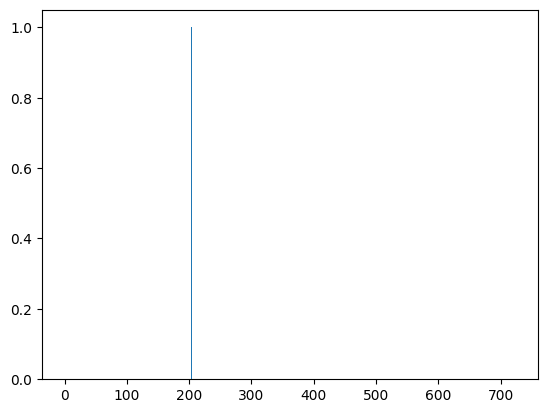

In [296]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [297]:
# test_data1 = test_data1.drop(' Unnamed: 0', axis=1)

############### CONCAT TRAINING DATA ON TOP OF TEST DATA

# column_list = list(test_data1.columns)

# ### this is the test data getting mapped
# unique_list = []
# number_list = []
# dict_list = []

# for i in column_list:
#     unique_list.append(list(test_data1[i].unique()))

# for i in list(range(len(unique_list))):
#     step_two = unique_list[i]
#     step_three = list(range(len(step_two)))
#     number_list.append(step_three)

# for i in list(range(len(unique_list))):
#     dict_list.append(dict(zip(unique_list[i], number_list[i])))

# for i in list(range(len(column_list))):
#     f = open(column_list[i]+".txt","w")

#     # write file
#     f.write(str(dict_list[i]))

#     # close file
#     f.close()

# ###########################################################################

# unique_list = []
# number_list = []
# dict_list = []
# map_column_list = column_list.copy()

# for i in map_column_list:
#     unique_list.append(list(test_data1[i].unique()))

# for i in list(range(len(unique_list))):
#     step_two = unique_list[i]
#     step_three = list(range(len(step_two)))
#     number_list.append(step_three)

# for i in list(range(len(unique_list))):
#     dict_list.append(dict(zip(unique_list[i], number_list[i])))

# for i in list(range(len(map_column_list))):
#     test_data1 = test_data1.replace({column_list[i]: dict_list[i]})

###########################################################################

X = test_data1.loc[:, test_data1.columns != "Customer"]

X = X.fillna(0)

X = X[500:]

In [298]:
X

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,woodworking,young_mens_apparel,young_womens_apparel,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s
60000,393,0,1,0.0,0.0,6,9.0,6.0,52.0,0.0,...,1,0,0,500,500,13,17,10.0,3.0,17
60001,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,0,0,0,501,501,331,303,1.0,0.0,303
60002,394,0,0,0.0,0.0,2,10.0,7.0,74.0,0.0,...,1,0,0,502,502,332,304,8.0,0.0,304
60003,395,0,0,0.0,0.0,2,10.0,7.0,28.0,0.0,...,0,0,0,503,503,333,305,6.0,0.0,305
60004,396,0,1,0.0,0.0,15,21.0,16.0,83.0,0.0,...,0,0,0,504,504,13,17,10.0,3.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,8425,0,0,2.0,3.0,5,5.0,5.0,31.0,0.0,...,0,0,0,10491,10491,4070,4275,6.0,0.0,4275
69996,8426,0,0,0.0,0.0,49,32.0,11.0,23.0,0.0,...,0,0,0,10492,10492,4071,4276,5.0,0.0,4276
69997,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,0,0,0,10493,10493,13,4277,10.0,0.0,4277
69998,8427,0,1,0.0,0.0,91,41.0,39.0,52.0,0.0,...,0,0,0,10494,10494,13,17,10.0,3.0,17


In [299]:
output_list = list(model.predict(X))
output_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [300]:
model.score(X,output_list)

1.0

In [301]:
# test_data1["person_uid"][500:] = test_data2["person_uid"][500:]
# test_data1 = test_data1.drop("Customer", axis=1)

In [302]:
output_data = pd.DataFrame({'person_uid': test_data2["person_uid"][500:], "Customer": output_list})
output_data

/tmp/ipykernel_75949/1325216322.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  output_data = pd.DataFrame({'person_uid': test_data2["person_uid"][500:], "Customer": output_list})


,person_uid,Customer
60000,838e9506-2e43-4081-8b22-d06fe36d6045,1
60001,62dfcc50-0d2a-47f1-a287-29cbffd1a819,1
60002,309d3423-b6c6-45d6-a1f7-e84d01fbeed5,1
60003,dba19443-0b04-4354-bb8b-4850af37635f,1
60004,75f444e6-a446-4ab2-acf9-09cce2b3437d,1
...,...,...
69995,c09cfbd9-a279-4028-ae1d-4bffb25ed93a,1
69996,2bb2147f-435c-4990-9670-ab727adf8fc6,1
69997,1e3f667b-53f5-4664-9368-e75e339c0cf1,1
69998,dd7d3ffe-6824-4758-8cdd-7d72539c8ceb,1


In [303]:
# grab all the 1s
customers = output_data[output_data["Customer"] == 1]
customers

,person_uid,Customer
60000,838e9506-2e43-4081-8b22-d06fe36d6045,1
60001,62dfcc50-0d2a-47f1-a287-29cbffd1a819,1
60002,309d3423-b6c6-45d6-a1f7-e84d01fbeed5,1
60003,dba19443-0b04-4354-bb8b-4850af37635f,1
60004,75f444e6-a446-4ab2-acf9-09cce2b3437d,1
...,...,...
69995,c09cfbd9-a279-4028-ae1d-4bffb25ed93a,1
69996,2bb2147f-435c-4990-9670-ab727adf8fc6,1
69997,1e3f667b-53f5-4664-9368-e75e339c0cf1,1
69998,dd7d3ffe-6824-4758-8cdd-7d72539c8ceb,1


In [304]:
# using the original data in place for now
# data3.loc[:, data3.columns != "Customer"]
data3 = customers.merge(test_data2.loc[:, test_data2.columns != "Customer"], how='inner', on='person_uid')
ids = data3["person_uid"]
data3



,person_uid,Customer,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,...,woodworking,young_mens_apparel,young_womens_apparel,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s
0,838e9506-2e43-4081-8b22-d06fe36d6045,1,05YLUS035HTENN7K,1,0,3.0,1.0,11,48.0,52.0,...,1,0,0,86483908,864839083908,NaN,NaN,NaN,NaN,NaN
1,62dfcc50-0d2a-47f1-a287-29cbffd1a819,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,752406967,7524069676967,"27a79907-56db-4254-8329-6586a20fee56,c6570151-...",mariafrancisco00@gmail.com,6.0,1.0,3886e345f2ac58609330419bc5b25d02
2,309d3423-b6c6-45d6-a1f7-e84d01fbeed5,1,05YLUS03MY0FQK8K,1,1,3.0,1.0,1,56.0,56.0,...,1,0,0,481926418,4819264186418,"02939b2e-9691-4a0f-9d89-e16dc1989e4d,30287ee3-...",erskinemom1965@gmail.com,14.0,1.0,da3af08ddcc688eb1c5ed8f3fc547193
3,dba19443-0b04-4354-bb8b-4850af37635f,1,05YLUS03SLRRTF2L,1,1,3.0,1.0,1,56.0,56.0,...,0,0,0,182016124,1820161246124,"29d7fc93-63ca-c9c0-cc42-e779d8175efb,6073b82b-...",lorettaspangler646@gmail.com,4.0,1.0,db882f29cf441f85439fcac4583b8ec6
4,75f444e6-a446-4ab2-acf9-09cce2b3437d,1,05YLUS03MLDTRVPC,1,0,3.0,1.0,1,94.0,94.0,...,0,0,0,334111536,3341115361536,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,c09cfbd9-a279-4028-ae1d-4bffb25ed93a,1,05YLUS03NRDWG8S3,1,1,4.0,2.0,NaN,NaN,NaN,...,0,0,0,553792957,5537929572957,"25e5c662-3160-44e3-a575-1c4c52807b46,49458a49-...",urzug@yahoo.com,4.0,1.0,9a20627b3f66a45004b0b4f1534fc8bc
9995,2bb2147f-435c-4990-9670-ab727adf8fc6,1,05YLUS03QBDE8TXR,1,1,3.0,1.0,1,46.0,46.0,...,0,0,0,337852921,3378529212921,"1344f1af-4a17-481e-bedb-95febd88938b,54e061e6-...",diana_benavides@hotmail.com,5.0,1.0,fd39ec949632cf6c169a6b717bddc80f
9996,1e3f667b-53f5-4664-9368-e75e339c0cf1,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,238327616,2383276167616,NaN,tara.klassen@comcast.net,NaN,1.0,438a9a73b6dc69ef3408aa2220154f5c
9997,dd7d3ffe-6824-4758-8cdd-7d72539c8ceb,1,05YLUS03CH7YS772,1,0,3.0,1.0,1,18.0,18.0,...,0,0,0,24217701,242177017701,NaN,NaN,NaN,NaN,NaN


In [305]:
# given customers data
data4 = data[data["Customer"] == 1][0:500]
# data4 = data4[0:3600]

In [306]:
# data4 = data4.loc[:, data4.columns != "Customer"]

In [307]:
data4

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,young_mens_apparel,young_womens_apparel,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s,Customer
0,05YLUS03J4RLYLLG,1,1,3.0,1.0,11,96.0,96.0,3.0,NaN,...,0,0,785728974,7857289748974,"484e4fbf-7dc5-45b0-9de7-f5b999250b01,553af8d5-...",pma0674@yahoo.com,9.0,1.0,284d38af85beba4be3a667c00327745f,1
1,05YLUS03C16DL2VY,1,1,3.0,1.0,1 1,40.0,40.0,99.0,NaN,...,0,0,953512127,9535121272127,"4ae822c5-2864-45d4-8efd-0f6d4afbb76d,8d0e2d76-...",gabrielbautista07@comcast.net,6.0,1.0,409f85fb33fd258032be751e41e74305,1
2,05YLUS03557N1V7F,1,1,3.0,5.0,1,62.0,62.0,25.0,NaN,...,0,0,985550053,9855500530053,45def91a-3bd8-42a9-afeb-0fa2b51c3cf2,ccsgjones@msn.com,1.0,1.0,eb61658b1b18ae99ac05f12c133b3a60,1
3,05YLUS03N4RJTXEL,1,1,3.0,1.0,1 1,74.0,74.0,51.0,NaN,...,0,0,302237281,3022372817281,"333a5c79-32df-4ae5-8140-29272450a374,b6a81bb1-...","garyricketts21@gmail.com,jackierick1997@gmail.com",2.0,2.0,"d485a06bb3accb54741246065ab9ae6e,bdff33c523ec9...",1
4,05YLUS03MFK0R6G0,1,1,3.0,1.0,1 1,72.0,72.0,24.0,NaN,...,0,0,329348712,3293487128712,"aee034f6-337e-4cd1-b529-5432a2115178,ee91336e-...",innes53@hotmail.com,3.0,1.0,5fce6ed113669d6da59537d8a43924d5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,05YLUS03401PJTY1,1,1,3.0,1.0,1 1,76.0,74.0,31.0,NaN,...,0,0,344652373,3446523732373,"21bf97fe-0d89-40aa-9533-68de29e71d3a,c9277cf0-...",wtrench314@aol.com,5.0,1.0,abcb9e636cdaab2d1101075f799da09a,1
246,05YLUS03GD5FM4G6,1,1,3.0,1.0,1 1,50.0,50.0,15.0,NaN,...,0,0,327015043,3270150435043,"2d2a1057-e5d9-4a4d-a73b-8f62815e3601,3ff24a1a-...",mimibnfl@icloud.com,11.0,1.0,4fb1043ceb511a6ba6b6e0a0acc2138e,1
247,05YLUS03HZLFQLCY,1,1,3.0,1.0,11,58.0,58.0,8.0,NaN,...,0,0,688635304,6886353045304,"3342e4d1-c975-4036-acab-debfd4b43416,38be5e6f-...","bjthomps6@hotmail.com,brad1970d@yahoo.com",10.0,2.0,"7c8ef25b5c51670e7a8ab398dd31107a,350777c3ede40...",1
248,NaN,1,1,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,0,0,280122858,2801228582858,"0f8711d8-270c-48ea-80e2-367d90c631a3,50c310dc-...",bfalls63@yahoo.com,5.0,1.0,a9a50bea10ab6a817693d6ad2e595717,1


In [308]:
combined = pd.concat([data4,data3])
combined

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,young_mens_apparel,young_womens_apparel,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s,Customer
0,05YLUS03J4RLYLLG,1,1,3.0,1.0,11,96.0,96.0,3.0,NaN,...,0,0,785728974,7857289748974,"484e4fbf-7dc5-45b0-9de7-f5b999250b01,553af8d5-...",pma0674@yahoo.com,9.0,1.0,284d38af85beba4be3a667c00327745f,1
1,05YLUS03C16DL2VY,1,1,3.0,1.0,1 1,40.0,40.0,99.0,NaN,...,0,0,953512127,9535121272127,"4ae822c5-2864-45d4-8efd-0f6d4afbb76d,8d0e2d76-...",gabrielbautista07@comcast.net,6.0,1.0,409f85fb33fd258032be751e41e74305,1
2,05YLUS03557N1V7F,1,1,3.0,5.0,1,62.0,62.0,25.0,NaN,...,0,0,985550053,9855500530053,45def91a-3bd8-42a9-afeb-0fa2b51c3cf2,ccsgjones@msn.com,1.0,1.0,eb61658b1b18ae99ac05f12c133b3a60,1
3,05YLUS03N4RJTXEL,1,1,3.0,1.0,1 1,74.0,74.0,51.0,NaN,...,0,0,302237281,3022372817281,"333a5c79-32df-4ae5-8140-29272450a374,b6a81bb1-...","garyricketts21@gmail.com,jackierick1997@gmail.com",2.0,2.0,"d485a06bb3accb54741246065ab9ae6e,bdff33c523ec9...",1
4,05YLUS03MFK0R6G0,1,1,3.0,1.0,1 1,72.0,72.0,24.0,NaN,...,0,0,329348712,3293487128712,"aee034f6-337e-4cd1-b529-5432a2115178,ee91336e-...",innes53@hotmail.com,3.0,1.0,5fce6ed113669d6da59537d8a43924d5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,05YLUS03NRDWG8S3,1,1,4.0,2.0,NaN,NaN,NaN,72.0,NaN,...,0,0,553792957,5537929572957,"25e5c662-3160-44e3-a575-1c4c52807b46,49458a49-...",urzug@yahoo.com,4.0,1.0,9a20627b3f66a45004b0b4f1534fc8bc,1
9995,05YLUS03QBDE8TXR,1,1,3.0,1.0,1,46.0,46.0,19.0,NaN,...,0,0,337852921,3378529212921,"1344f1af-4a17-481e-bedb-95febd88938b,54e061e6-...",diana_benavides@hotmail.com,5.0,1.0,fd39ec949632cf6c169a6b717bddc80f,1
9996,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,238327616,2383276167616,NaN,tara.klassen@comcast.net,NaN,1.0,438a9a73b6dc69ef3408aa2220154f5c,1
9997,05YLUS03CH7YS772,1,0,3.0,1.0,1,18.0,18.0,18.0,NaN,...,0,0,24217701,242177017701,NaN,NaN,NaN,NaN,NaN,1


In [309]:
# data5 = data3.copy()
# test_data1.loc[:, test_data1.columns != "Customer"]
unique_list = []
number_list = []
dict_list = []
column_list = list(combined.columns)

for i in column_list:
    unique_list.append(list(combined[i].unique()))

for i in list(range(len(unique_list))):
    step_two = unique_list[i]
    step_three = list(range(len(step_two)))
    number_list.append(step_three)

for i in list(range(len(unique_list))):
    dict_list.append(dict(zip(unique_list[i], number_list[i])))

for i in list(range(len(column_list))):
    combined = combined.replace({column_list[i]: dict_list[i]})

In [310]:
data3 = combined[500:]

In [311]:
len(data3)

9749

In [312]:
data4 = combined[0:500]
len(data4)

500

In [313]:
# floats1 = list(data3.select_dtypes(include=['float16', 'float32', 'float64']).columns)
# floats2 = list(data4.select_dtypes(include=['float16', 'float32', 'float64']).columns)

# data3 = data3.fillna(1777777)
# data4 =  data4.fillna(1777777)

# data3[floats1] = data3[floats1].round(0)
# data4[floats2] = data4[floats2].round(0)

# data3[floats1] = data3[floats1].astype(int)
# data4[floats2] = data4[floats2].astype(int)

# data3 = data3.astype(int)
# data4 = data4.astype(int)


In [314]:
data3

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,young_mens_apparel,young_womens_apparel,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s,Customer
250,402,0,1,0.0,4.0,92,36.0,37.0,6.0,0.0,...,0,0,500,500,13,17,10.0,3.0,17,0
251,403,0,1,0.0,0.0,8,35.0,25.0,30.0,0.0,...,1,0,501,501,13,17,10.0,3.0,17,0
252,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,0,0,502,502,325,295,5.0,0.0,295,0
253,404,0,1,0.0,0.0,52,6.0,19.0,70.0,0.0,...,0,0,503,503,13,17,10.0,3.0,17,0
254,405,0,0,0.0,0.0,54,13.0,28.0,61.0,0.0,...,0,0,504,504,326,296,12.0,0.0,296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,8228,0,0,2.0,3.0,5,5.0,5.0,31.0,0.0,...,0,0,10241,10241,3968,4168,6.0,0.0,4168,0
9995,8229,0,0,0.0,0.0,49,32.0,11.0,23.0,0.0,...,0,0,10242,10242,3969,4169,5.0,0.0,4169,0
9996,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,0,0,10243,10243,13,4170,10.0,0.0,4170,0
9997,8230,0,1,0.0,0.0,73,41.0,39.0,52.0,0.0,...,0,0,10244,10244,13,17,10.0,3.0,17,0


In [315]:
data4.iloc[2]

aid                  2.0
active_ind           0.0
active_emails        0.0
address_lines_qty    0.0
address_type_ind     1.0
                    ... 
emails               2.0
num_devices          2.0
num_emails           0.0
md5s                 2.0
Customer             0.0
Name: 2, Length: 725, dtype: float64

In [316]:
len(data3)

9749

In [317]:
data3.iloc[1]

aid                  403.0
active_ind             0.0
active_emails          1.0
address_lines_qty      0.0
address_type_ind       0.0
                     ...  
emails                17.0
num_devices           10.0
num_emails             3.0
md5s                  17.0
Customer               0.0
Name: 251, Length: 725, dtype: float64

In [318]:
# average_scores_corr = []
# for i in list(range(len(data3))):
#     # s0 = data3.iloc[i].corr(data4.iloc[0])
#     s1 = data3.iloc[i].corr(data4.iloc[1])
#     s2 = data3.iloc[i].corr(data4.iloc[2])
#     s3 = data3.iloc[i].corr(data4.iloc[3])
#     s4 = data3.iloc[i].corr(data4.iloc[4])
#     s5 = data3.iloc[i].corr(data4.iloc[5])
#     s6 = data3.iloc[i].corr(data4.iloc[6])
#     s7 = data3.iloc[i].corr(data4.iloc[7])
#     s8 = data3.iloc[i].corr(data4.iloc[8])
#     s9 = data3.iloc[i].corr(data4.iloc[9])
#     s10 = data3.iloc[i].corr(data4.iloc[10])
#     s11 = data3.iloc[i].corr(data4.iloc[11])
#     s12 = data3.iloc[i].corr(data4.iloc[12])
#     s13 = data3.iloc[i].corr(data4.iloc[13])
#     s14 = data3.iloc[i].corr(data4.iloc[14])
#     s15 = data3.iloc[i].corr(data4.iloc[15])
#     s16 = data3.iloc[i].corr(data4.iloc[16])
#     s17 = data3.iloc[i].corr(data4.iloc[17])
#     s18 = data3.iloc[i].corr(data4.iloc[18])
#     s19 = data3.iloc[i].corr(data4.iloc[19])
#     s20 = data3.iloc[i].corr(data4.iloc[20])
#     s21 = data3.iloc[i].corr(data4.iloc[21])
#     s22 = data3.iloc[i].corr(data4.iloc[22])
#     s23 = data3.iloc[i].corr(data4.iloc[23])
#     s24 = data3.iloc[i].corr(data4.iloc[24])
#     s25 = data3.iloc[i].corr(data4.iloc[25])
#     s26 = data3.iloc[i].corr(data4.iloc[26])
#     s27 = data3.iloc[i].corr(data4.iloc[27])
#     s28 = data3.iloc[i].corr(data4.iloc[28])
#     s29 = data3.iloc[i].corr(data4.iloc[29])
#     s30 = data3.iloc[i].corr(data4.iloc[30])
#     s31 = data3.iloc[i].corr(data4.iloc[31])
#     s32 = data3.iloc[i].corr(data4.iloc[32])
#     s33 = data3.iloc[i].corr(data4.iloc[33])
#     s34 = data3.iloc[i].corr(data4.iloc[34])
#     s35 = data3.iloc[i].corr(data4.iloc[35])
#     s36 = data3.iloc[i].corr(data4.iloc[36])
#     s37 = data3.iloc[i].corr(data4.iloc[37])
#     s38 = data3.iloc[i].corr(data4.iloc[38])
#     s39 = data3.iloc[i].corr(data4.iloc[39])
#     s40 = data3.iloc[i].corr(data4.iloc[40])
#     s41 = data3.iloc[i].corr(data4.iloc[41])
#     s42 = data3.iloc[i].corr(data4.iloc[42])
#     s43 = data3.iloc[i].corr(data4.iloc[43])
#     s44 = data3.iloc[i].corr(data4.iloc[44])
#     s45 = data3.iloc[i].corr(data4.iloc[45])
#     s46 = data3.iloc[i].corr(data4.iloc[46])
#     s47 = data3.iloc[i].corr(data4.iloc[47])
#     s48 = data3.iloc[i].corr(data4.iloc[48])
#     s49 = data3.iloc[i].corr(data4.iloc[49])
#     s50 = data3.iloc[i].corr(data4.iloc[50])
#     s51 = data3.iloc[i].corr(data4.iloc[51])
#     s52 = data3.iloc[i].corr(data4.iloc[52])
#     s53 = data3.iloc[i].corr(data4.iloc[53])
#     s54 = data3.iloc[i].corr(data4.iloc[54])
#     s55 = data3.iloc[i].corr(data4.iloc[55])
#     s56 = data3.iloc[i].corr(data4.iloc[56])
#     s57 = data3.iloc[i].corr(data4.iloc[57])
#     s58 = data3.iloc[i].corr(data4.iloc[58])
#     s59 = data3.iloc[i].corr(data4.iloc[59])
#     s60 = data3.iloc[i].corr(data4.iloc[60])
#     s61 = data3.iloc[i].corr(data4.iloc[61])
#     s62 = data3.iloc[i].corr(data4.iloc[62])
#     s63 = data3.iloc[i].corr(data4.iloc[63])
#     s64 = data3.iloc[i].corr(data4.iloc[64])
#     s65 = data3.iloc[i].corr(data4.iloc[65])
#     s66 = data3.iloc[i].corr(data4.iloc[66])
#     s67 = data3.iloc[i].corr(data4.iloc[67])
#     s68 = data3.iloc[i].corr(data4.iloc[68])
#     s69 = data3.iloc[i].corr(data4.iloc[69])
#     s70 = data3.iloc[i].corr(data4.iloc[70])
#     s71 = data3.iloc[i].corr(data4.iloc[71])
#     s72 = data3.iloc[i].corr(data4.iloc[72])
#     s73 = data3.iloc[i].corr(data4.iloc[73])
#     s74 = data3.iloc[i].corr(data4.iloc[74])
#     s75 = data3.iloc[i].corr(data4.iloc[75])
#     s76 = data3.iloc[i].corr(data4.iloc[76])
#     s77 = data3.iloc[i].corr(data4.iloc[77])
#     s78 = data3.iloc[i].corr(data4.iloc[78])
#     s79 = data3.iloc[i].corr(data4.iloc[79])
#     s80 = data3.iloc[i].corr(data4.iloc[80])
#     s81 = data3.iloc[i].corr(data4.iloc[81])
#     s82 = data3.iloc[i].corr(data4.iloc[82])
#     s83 = data3.iloc[i].corr(data4.iloc[83])
#     s84 = data3.iloc[i].corr(data4.iloc[84])
#     s85 = data3.iloc[i].corr(data4.iloc[85])
#     s86 = data3.iloc[i].corr(data4.iloc[86])
#     s87 = data3.iloc[i].corr(data4.iloc[87])
#     s88 = data3.iloc[i].corr(data4.iloc[88])
#     s89 = data3.iloc[i].corr(data4.iloc[89])
#     s90 = data3.iloc[i].corr(data4.iloc[90])
#     s91 = data3.iloc[i].corr(data4.iloc[91])
#     s92 = data3.iloc[i].corr(data4.iloc[92])
#     s93 = data3.iloc[i].corr(data4.iloc[93])
#     s94 = data3.iloc[i].corr(data4.iloc[94])
#     s95 = data3.iloc[i].corr(data4.iloc[95])
#     s96 = data3.iloc[i].corr(data4.iloc[96])
#     s97 = data3.iloc[i].corr(data4.iloc[97])
#     s98 = data3.iloc[i].corr(data4.iloc[98])
#     s99 = data3.iloc[i].corr(data4.iloc[99])
#     s100 = data3.iloc[i].corr(data4.iloc[100])
#     s101 = data3.iloc[i].corr(data4.iloc[101])
#     s102 = data3.iloc[i].corr(data4.iloc[102])
#     s103 = data3.iloc[i].corr(data4.iloc[103])
#     s104 = data3.iloc[i].corr(data4.iloc[104])
#     s105 = data3.iloc[i].corr(data4.iloc[105])
#     s106 = data3.iloc[i].corr(data4.iloc[106])
#     s107 = data3.iloc[i].corr(data4.iloc[107])
#     s108 = data3.iloc[i].corr(data4.iloc[108])
#     s109 = data3.iloc[i].corr(data4.iloc[109])
#     s110 = data3.iloc[i].corr(data4.iloc[110])
#     s111 = data3.iloc[i].corr(data4.iloc[111])
#     s112 = data3.iloc[i].corr(data4.iloc[112])
#     s113 = data3.iloc[i].corr(data4.iloc[113])
#     s114 = data3.iloc[i].corr(data4.iloc[114])
#     s115 = data3.iloc[i].corr(data4.iloc[115])
#     s116 = data3.iloc[i].corr(data4.iloc[116])
#     s117 = data3.iloc[i].corr(data4.iloc[117])
#     s118 = data3.iloc[i].corr(data4.iloc[118])
#     s119 = data3.iloc[i].corr(data4.iloc[119])
#     s120 = data3.iloc[i].corr(data4.iloc[120])
#     s121 = data3.iloc[i].corr(data4.iloc[121])
#     s122 = data3.iloc[i].corr(data4.iloc[122])
#     s123 = data3.iloc[i].corr(data4.iloc[123])
#     s124 = data3.iloc[i].corr(data4.iloc[124])
#     s125 = data3.iloc[i].corr(data4.iloc[125])
#     s126 = data3.iloc[i].corr(data4.iloc[126])
#     s127 = data3.iloc[i].corr(data4.iloc[127])
#     s128 = data3.iloc[i].corr(data4.iloc[128])
#     s129 = data3.iloc[i].corr(data4.iloc[129])
#     s130 = data3.iloc[i].corr(data4.iloc[130])
#     s131 = data3.iloc[i].corr(data4.iloc[131])
#     s132 = data3.iloc[i].corr(data4.iloc[132])
#     s133 = data3.iloc[i].corr(data4.iloc[133])
#     s134 = data3.iloc[i].corr(data4.iloc[134])
#     s135 = data3.iloc[i].corr(data4.iloc[135])
#     s136 = data3.iloc[i].corr(data4.iloc[136])
#     s137 = data3.iloc[i].corr(data4.iloc[137])
#     s138 = data3.iloc[i].corr(data4.iloc[138])
#     s139 = data3.iloc[i].corr(data4.iloc[139])
#     s140 = data3.iloc[i].corr(data4.iloc[140])
#     s141 = data3.iloc[i].corr(data4.iloc[141])
#     s142 = data3.iloc[i].corr(data4.iloc[142])
#     s143 = data3.iloc[i].corr(data4.iloc[143])
#     s144 = data3.iloc[i].corr(data4.iloc[144])
#     s145 = data3.iloc[i].corr(data4.iloc[145])
#     s146 = data3.iloc[i].corr(data4.iloc[146])
#     s147 = data3.iloc[i].corr(data4.iloc[147])
#     s148 = data3.iloc[i].corr(data4.iloc[148])
#     s149 = data3.iloc[i].corr(data4.iloc[149])
#     s150 = data3.iloc[i].corr(data4.iloc[150])
#     s151 = data3.iloc[i].corr(data4.iloc[151])
#     s152 = data3.iloc[i].corr(data4.iloc[152])
#     s153 = data3.iloc[i].corr(data4.iloc[153])
#     s154 = data3.iloc[i].corr(data4.iloc[154])
#     s155 = data3.iloc[i].corr(data4.iloc[155])
#     s156 = data3.iloc[i].corr(data4.iloc[156])
#     s157 = data3.iloc[i].corr(data4.iloc[157])
#     s158 = data3.iloc[i].corr(data4.iloc[158])
#     s159 = data3.iloc[i].corr(data4.iloc[159])
#     s160 = data3.iloc[i].corr(data4.iloc[160])
#     s161 = data3.iloc[i].corr(data4.iloc[161])
#     s162 = data3.iloc[i].corr(data4.iloc[162])
#     s163 = data3.iloc[i].corr(data4.iloc[163])
#     s164 = data3.iloc[i].corr(data4.iloc[164])
#     s165 = data3.iloc[i].corr(data4.iloc[165])
#     s166 = data3.iloc[i].corr(data4.iloc[166])
#     s167 = data3.iloc[i].corr(data4.iloc[167])
#     s168 = data3.iloc[i].corr(data4.iloc[168])
#     s169 = data3.iloc[i].corr(data4.iloc[169])
#     s170 = data3.iloc[i].corr(data4.iloc[170])
#     s171 = data3.iloc[i].corr(data4.iloc[171])
#     s172 = data3.iloc[i].corr(data4.iloc[172])
#     s173 = data3.iloc[i].corr(data4.iloc[173])
#     s174 = data3.iloc[i].corr(data4.iloc[174])
#     s175 = data3.iloc[i].corr(data4.iloc[175])
#     s176 = data3.iloc[i].corr(data4.iloc[176])
#     s177 = data3.iloc[i].corr(data4.iloc[177])
#     s178 = data3.iloc[i].corr(data4.iloc[178])
#     s179 = data3.iloc[i].corr(data4.iloc[179])
#     s180 = data3.iloc[i].corr(data4.iloc[180])
#     s181 = data3.iloc[i].corr(data4.iloc[181])
#     s182 = data3.iloc[i].corr(data4.iloc[182])
#     s183 = data3.iloc[i].corr(data4.iloc[183])
#     s184 = data3.iloc[i].corr(data4.iloc[184])
#     s185 = data3.iloc[i].corr(data4.iloc[185])
#     s186 = data3.iloc[i].corr(data4.iloc[186])
#     s187 = data3.iloc[i].corr(data4.iloc[187])
#     s188 = data3.iloc[i].corr(data4.iloc[188])
#     s189 = data3.iloc[i].corr(data4.iloc[189])
#     s190 = data3.iloc[i].corr(data4.iloc[190])
#     s191 = data3.iloc[i].corr(data4.iloc[191])
#     s192 = data3.iloc[i].corr(data4.iloc[192])
#     s193 = data3.iloc[i].corr(data4.iloc[193])
#     s194 = data3.iloc[i].corr(data4.iloc[194])
#     s195 = data3.iloc[i].corr(data4.iloc[195])
#     s196 = data3.iloc[i].corr(data4.iloc[196])
#     s197 = data3.iloc[i].corr(data4.iloc[197])
#     s198 = data3.iloc[i].corr(data4.iloc[198])
#     s199 = data3.iloc[i].corr(data4.iloc[199])
#     s200 = data3.iloc[i].corr(data4.iloc[200])
#     s201 = data3.iloc[i].corr(data4.iloc[201])
#     s202 = data3.iloc[i].corr(data4.iloc[202])
#     s203 = data3.iloc[i].corr(data4.iloc[203])
#     s204 = data3.iloc[i].corr(data4.iloc[204])
#     s205 = data3.iloc[i].corr(data4.iloc[205])
#     s206 = data3.iloc[i].corr(data4.iloc[206])
#     s207 = data3.iloc[i].corr(data4.iloc[207])
#     s208 = data3.iloc[i].corr(data4.iloc[208])
#     s209 = data3.iloc[i].corr(data4.iloc[209])
#     s210 = data3.iloc[i].corr(data4.iloc[210])
#     s211 = data3.iloc[i].corr(data4.iloc[211])
#     s212 = data3.iloc[i].corr(data4.iloc[212])
#     s213 = data3.iloc[i].corr(data4.iloc[213])
#     s214 = data3.iloc[i].corr(data4.iloc[214])
#     s215 = data3.iloc[i].corr(data4.iloc[215])
#     s216 = data3.iloc[i].corr(data4.iloc[216])
#     s217 = data3.iloc[i].corr(data4.iloc[217])
#     s218 = data3.iloc[i].corr(data4.iloc[218])
#     s219 = data3.iloc[i].corr(data4.iloc[219])
#     s220 = data3.iloc[i].corr(data4.iloc[220])
#     s221 = data3.iloc[i].corr(data4.iloc[221])
#     s222 = data3.iloc[i].corr(data4.iloc[222])
#     s223 = data3.iloc[i].corr(data4.iloc[223])
#     s224 = data3.iloc[i].corr(data4.iloc[224])
#     s225 = data3.iloc[i].corr(data4.iloc[225])
#     s226 = data3.iloc[i].corr(data4.iloc[226])
#     s227 = data3.iloc[i].corr(data4.iloc[227])
#     s228 = data3.iloc[i].corr(data4.iloc[228])
#     s229 = data3.iloc[i].corr(data4.iloc[229])
#     s230 = data3.iloc[i].corr(data4.iloc[230])
#     s231 = data3.iloc[i].corr(data4.iloc[231])
#     s232 = data3.iloc[i].corr(data4.iloc[232])
#     s233 = data3.iloc[i].corr(data4.iloc[233])
#     s234 = data3.iloc[i].corr(data4.iloc[234])
#     s235 = data3.iloc[i].corr(data4.iloc[235])
#     s236 = data3.iloc[i].corr(data4.iloc[236])
#     s237 = data3.iloc[i].corr(data4.iloc[237])
#     s238 = data3.iloc[i].corr(data4.iloc[238])
#     s239 = data3.iloc[i].corr(data4.iloc[239])
#     s240 = data3.iloc[i].corr(data4.iloc[240])
#     s241 = data3.iloc[i].corr(data4.iloc[241])
#     s242 = data3.iloc[i].corr(data4.iloc[242])
#     s243 = data3.iloc[i].corr(data4.iloc[243])
#     s244 = data3.iloc[i].corr(data4.iloc[244])
#     s245 = data3.iloc[i].corr(data4.iloc[245])
#     s246 = data3.iloc[i].corr(data4.iloc[246])
#     s247 = data3.iloc[i].corr(data4.iloc[247])
#     s248 = data3.iloc[i].corr(data4.iloc[248])
#     s249 = data3.iloc[i].corr(data4.iloc[249])
#     s250 = data3.iloc[i].corr(data4.iloc[250])
#     s251 = data3.iloc[i].corr(data4.iloc[251])
#     s252 = data3.iloc[i].corr(data4.iloc[252])
#     s253 = data3.iloc[i].corr(data4.iloc[253])
#     s254 = data3.iloc[i].corr(data4.iloc[254])
#     s255 = data3.iloc[i].corr(data4.iloc[255])
#     s256 = data3.iloc[i].corr(data4.iloc[256])
#     s257 = data3.iloc[i].corr(data4.iloc[257])
#     s258 = data3.iloc[i].corr(data4.iloc[258])
#     s259 = data3.iloc[i].corr(data4.iloc[259])
#     s260 = data3.iloc[i].corr(data4.iloc[260])
#     s261 = data3.iloc[i].corr(data4.iloc[261])
#     s262 = data3.iloc[i].corr(data4.iloc[262])
#     s263 = data3.iloc[i].corr(data4.iloc[263])
#     s264 = data3.iloc[i].corr(data4.iloc[264])
#     s265 = data3.iloc[i].corr(data4.iloc[265])
#     s266 = data3.iloc[i].corr(data4.iloc[266])
#     s267 = data3.iloc[i].corr(data4.iloc[267])
#     s268 = data3.iloc[i].corr(data4.iloc[268])
#     s269 = data3.iloc[i].corr(data4.iloc[269])
#     s270 = data3.iloc[i].corr(data4.iloc[270])
#     s271 = data3.iloc[i].corr(data4.iloc[271])
#     s272 = data3.iloc[i].corr(data4.iloc[272])
#     s273 = data3.iloc[i].corr(data4.iloc[273])
#     s274 = data3.iloc[i].corr(data4.iloc[274])
#     s275 = data3.iloc[i].corr(data4.iloc[275])
#     s276 = data3.iloc[i].corr(data4.iloc[276])
#     s277 = data3.iloc[i].corr(data4.iloc[277])
#     s278 = data3.iloc[i].corr(data4.iloc[278])
#     s279 = data3.iloc[i].corr(data4.iloc[279])
#     s280 = data3.iloc[i].corr(data4.iloc[280])
#     s281 = data3.iloc[i].corr(data4.iloc[281])
#     s282 = data3.iloc[i].corr(data4.iloc[282])
#     s283 = data3.iloc[i].corr(data4.iloc[283])
#     s284 = data3.iloc[i].corr(data4.iloc[284])
#     s285 = data3.iloc[i].corr(data4.iloc[285])
#     s286 = data3.iloc[i].corr(data4.iloc[286])
#     s287 = data3.iloc[i].corr(data4.iloc[287])
#     s288 = data3.iloc[i].corr(data4.iloc[288])
#     s289 = data3.iloc[i].corr(data4.iloc[289])
#     s290 = data3.iloc[i].corr(data4.iloc[290])
#     s291 = data3.iloc[i].corr(data4.iloc[291])
#     s292 = data3.iloc[i].corr(data4.iloc[292])
#     s293 = data3.iloc[i].corr(data4.iloc[293])
#     s294 = data3.iloc[i].corr(data4.iloc[294])
#     s295 = data3.iloc[i].corr(data4.iloc[295])
#     s296 = data3.iloc[i].corr(data4.iloc[296])
#     s297 = data3.iloc[i].corr(data4.iloc[297])
#     s298 = data3.iloc[i].corr(data4.iloc[298])
#     s299 = data3.iloc[i].corr(data4.iloc[299])


#     average = mean([s1,
# s2,
# s3,
# s4,
# s5,
# s6,
# s7,
# s8,
# s9,
# s10,
# s11,
# s12,
# s13,
# s14,
# s15,
# s16,
# s17,
# s18,
# s19,
# s20,
# s21,
# s22,
# s23,
# s24,
# s25,
# s26,
# s27,
# s28,
# s29,
# s30,
# s31,
# s32,
# s33,
# s34,
# s35,
# s36,
# s37,
# s38,
# s39,
# s40,
# s41,
# s42,
# s43,
# s44,
# s45,
# s46,
# s47,
# s48,
# s49,
# s50,
# s51,
# s52,
# s53,
# s54,
# s55,
# s56,
# s57,
# s58,
# s59,
# s60,
# s61,
# s62,
# s63,
# s64,
# s65,
# s66,
# s67,
# s68,
# s69,
# s70,
# s71,
# s72,
# s73,
# s74,
# s75,
# s76,
# s77,
# s78,
# s79,
# s80,
# s81,
# s82,
# s83,
# s84,
# s85,
# s86,
# s87,
# s88,
# s89,
# s90,
# s91,
# s92,
# s93,
# s94,
# s95,
# s96,
# s97,
# s98,
# s99,
# s100,
# s101,
# s102,
# s103,
# s104,
# s105,
# s106,
# s107,
# s108,
# s109,
# s110,
# s111,
# s112,
# s113,
# s114,
# s115,
# s116,
# s117,
# s118,
# s119,
# s120,
# s121,
# s122,
# s123,
# s124,
# s125,
# s126,
# s127,
# s128,
# s129,
# s130,
# s131,
# s132,
# s133,
# s134,
# s135,
# s136,
# s137,
# s138,
# s139,
# s140,
# s141,
# s142,
# s143,
# s144,
# s145,
# s146,
# s147,
# s148,
# s149,
# s150,
# s151,
# s152,
# s153,
# s154,
# s155,
# s156,
# s157,
# s158,
# s159,
# s160,
# s161,
# s162,
# s163,
# s164,
# s165,
# s166,
# s167,
# s168,
# s169,
# s170,
# s171,
# s172,
# s173,
# s174,
# s175,
# s176,
# s177,
# s178,
# s179,
# s180,
# s181,
# s182,
# s183,
# s184,
# s185,
# s186,
# s187,
# s188,
# s189,
# s190,
# s191,
# s192,
# s193,
# s194,
# s195,
# s196,
# s197,
# s198,
# s199,
# s200,
# s201,
# s202,
# s203,
# s204,
# s205,
# s206,
# s207,
# s208,
# s209,
# s210,
# s211,
# s212,
# s213,
# s214,
# s215,
# s216,
# s217,
# s218,
# s219,
# s220,
# s221,
# s222,
# s223,
# s224,
# s225,
# s226,
# s227,
# s228,
# s229,
# s230,
# s231,
# s232,
# s233,
# s234,
# s235,
# s236,
# s237,
# s238,
# s239,
# s240,
# s241,
# s242,
# s243,
# s244,
# s245,
# s246,
# s247,
# s248,
# s249,
# s250,
# s251,
# s252,
# s253,
# s254,
# s255,
# s256,
# s257,
# s258,
# s259,
# s260,
# s261,
# s262,
# s263,
# s264,
# s265,
# s266,
# s267,
# s268,
# s269,
# s270,
# s271,
# s272,
# s273,
# s274,
# s275,
# s276,
# s277,
# s278,
# s279,
# s280,
# s281,
# s282,
# s283,
# s284,
# s285,
# s286,
# s287,
# s288,
# s289,
# s290,
# s291,
# s292,
# s293,
# s294,
# s295,
# s296,
# s297,
# s298,
# s299,
# s300,
# s301,
# s302,
# s303,
# s304,
# s305,
# s306,
# s307,
# s308,
# s309,
# s310,
# s311,
# s312,
# s313,
# s314,
# s315,
# s316,
# s317,
# s318,
# s319,
# s320,
# s321,
# s322,
# s323,
# s324,
# s325,
# s326,
# s327,
# s328,
# s329,
# s330,
# s331,
# s332,
# s333,
# s334,
# s335,
# s336,
# s337,
# s338,
# s339,
# s340,
# s341,
# s342,
# s343,
# s344,
# s345,
# s346,
# s347,
# s348,
# s349,
# s350,
# s351,
# s352,
# s353,
# s354,
# s355,
# s356,
# s357,
# s358,
# s359,
# s360,
# s361,
# s362,
# s363,
# s364,
# s365,
# s366,
# s367,
# s368,
# s369,
# s370,
# s371,
# s372,
# s373,
# s374,
# s375,
# s376,
# s377,
# s378,
# s379,
# s380,
# s381,
# s382,
# s383,
# s384,
# s385,
# s386,
# s387,
# s388,
# s389,
# s390,
# s391,
# s392,
# s393,
# s394,
# s395,
# s396,
# s397,
# s398,
# s399,
# s400,
# s401,
# s402,
# s403,
# s404,
# s405,
# s406,
# s407,
# s408,
# s409,
# s410,
# s411,
# s412,
# s413,
# s414,
# s415,
# s416,
# s417,
# s418,
# s419,
# s420,
# s421,
# s422,
# s423,
# s424,
# s425,
# s426,
# s427,
# s428,
# s429,
# s430,
# s431,
# s432,
# s433,
# s434,
# s435,
# s436,
# s437,
# s438,
# s439,
# s440,
# s441,
# s442,
# s443,
# s444,
# s445,
# s446,
# s447,
# s448,
# s449,
# s450,
# s451,
# s452,
# s453,
# s454,
# s455,
# s456,
# s457,
# s458,
# s459,
# s460,
# s461,
# s462,
# s463,
# s464,
# s465,
# s466,
# s467,
# s468,
# s469,
# s470,
# s471,
# s472,
# s473,
# s474,
# s475,
# s476,
# s477,
# s478,
# s479,
# s480,
# s481,
# s482,
# s483,
# s484,
# s485,
# s486,
# s487,
# s488,
# s489,
# s490,
# s491,
# s492,
# s493,
# s494,
# s495,
# s496,
# s497,
# s498,])
#     average_scores_corr.append(average)
#     print(average)
#     print("----------")


In [319]:
average_scores_cosine = []
for i in list(range(len(data3))):
    # s0 = data3.iloc[i].corr(data4.iloc[1])
    # s1 = data3.iloc[i].corr(data4.iloc[2])
    # s0 = np.dot(list(data3.iloc[i]),list(data4.iloc[0]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[0])))
    s1 = np.dot(list(data3.iloc[i]),list(data4.iloc[1]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[1])))
    s2 = np.dot(list(data3.iloc[i]),list(data4.iloc[2]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[2])))
    s3 = np.dot(list(data3.iloc[i]),list(data4.iloc[3]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[3])))
    s4 = np.dot(list(data3.iloc[i]),list(data4.iloc[4]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[4])))
    s5 = np.dot(list(data3.iloc[i]),list(data4.iloc[5]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[5])))
    s6 = np.dot(list(data3.iloc[i]),list(data4.iloc[6]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[6])))
    s7 = np.dot(list(data3.iloc[i]),list(data4.iloc[7]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[7])))
    s8 = np.dot(list(data3.iloc[i]),list(data4.iloc[8]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[8])))
    s9 = np.dot(list(data3.iloc[i]),list(data4.iloc[9]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[9])))
    s10 = np.dot(list(data3.iloc[i]),list(data4.iloc[10]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[10])))
    s11 = np.dot(list(data3.iloc[i]),list(data4.iloc[11]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[11])))
    s12 = np.dot(list(data3.iloc[i]),list(data4.iloc[12]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[12])))
    s13 = np.dot(list(data3.iloc[i]),list(data4.iloc[13]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[13])))
    s14 = np.dot(list(data3.iloc[i]),list(data4.iloc[14]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[14])))
    s15 = np.dot(list(data3.iloc[i]),list(data4.iloc[15]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[15])))
    s16 = np.dot(list(data3.iloc[i]),list(data4.iloc[16]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[16])))
    s17 = np.dot(list(data3.iloc[i]),list(data4.iloc[17]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[17])))
    s18 = np.dot(list(data3.iloc[i]),list(data4.iloc[18]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[18])))
    s19 = np.dot(list(data3.iloc[i]),list(data4.iloc[19]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[19])))
    s20 = np.dot(list(data3.iloc[i]),list(data4.iloc[20]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[20])))
    s21 = np.dot(list(data3.iloc[i]),list(data4.iloc[21]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[21])))
    s22 = np.dot(list(data3.iloc[i]),list(data4.iloc[22]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[22])))
    s23 = np.dot(list(data3.iloc[i]),list(data4.iloc[23]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[23])))
    s24 = np.dot(list(data3.iloc[i]),list(data4.iloc[24]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[24])))
    s25 = np.dot(list(data3.iloc[i]),list(data4.iloc[25]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[25])))
    s26 = np.dot(list(data3.iloc[i]),list(data4.iloc[26]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[26])))
    s27 = np.dot(list(data3.iloc[i]),list(data4.iloc[27]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[27])))
    s28 = np.dot(list(data3.iloc[i]),list(data4.iloc[28]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[28])))
    s29 = np.dot(list(data3.iloc[i]),list(data4.iloc[29]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[29])))
    s30 = np.dot(list(data3.iloc[i]),list(data4.iloc[30]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[30])))
    s31 = np.dot(list(data3.iloc[i]),list(data4.iloc[31]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[31])))
    s32 = np.dot(list(data3.iloc[i]),list(data4.iloc[32]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[32])))
    s33 = np.dot(list(data3.iloc[i]),list(data4.iloc[33]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[33])))
    s34 = np.dot(list(data3.iloc[i]),list(data4.iloc[34]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[34])))
    s35 = np.dot(list(data3.iloc[i]),list(data4.iloc[35]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[35])))
    s36 = np.dot(list(data3.iloc[i]),list(data4.iloc[36]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[36])))
    s37 = np.dot(list(data3.iloc[i]),list(data4.iloc[37]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[37])))
    s38 = np.dot(list(data3.iloc[i]),list(data4.iloc[38]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[38])))
    s39 = np.dot(list(data3.iloc[i]),list(data4.iloc[39]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[39])))
    s40 = np.dot(list(data3.iloc[i]),list(data4.iloc[40]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[40])))
    s41 = np.dot(list(data3.iloc[i]),list(data4.iloc[41]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[41])))
    s42 = np.dot(list(data3.iloc[i]),list(data4.iloc[42]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[42])))
    s43 = np.dot(list(data3.iloc[i]),list(data4.iloc[43]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[43])))
    s44 = np.dot(list(data3.iloc[i]),list(data4.iloc[44]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[44])))
    s45 = np.dot(list(data3.iloc[i]),list(data4.iloc[45]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[45])))
    s46 = np.dot(list(data3.iloc[i]),list(data4.iloc[46]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[46])))
    s47 = np.dot(list(data3.iloc[i]),list(data4.iloc[47]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[47])))
    s48 = np.dot(list(data3.iloc[i]),list(data4.iloc[48]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[48])))
    s49 = np.dot(list(data3.iloc[i]),list(data4.iloc[49]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[49])))
    s50 = np.dot(list(data3.iloc[i]),list(data4.iloc[50]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[50])))
    s51 = np.dot(list(data3.iloc[i]),list(data4.iloc[51]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[51])))
    s52 = np.dot(list(data3.iloc[i]),list(data4.iloc[52]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[52])))
    s53 = np.dot(list(data3.iloc[i]),list(data4.iloc[53]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[53])))
    s54 = np.dot(list(data3.iloc[i]),list(data4.iloc[54]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[54])))
    s55 = np.dot(list(data3.iloc[i]),list(data4.iloc[55]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[55])))
    s56 = np.dot(list(data3.iloc[i]),list(data4.iloc[56]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[56])))
    s57 = np.dot(list(data3.iloc[i]),list(data4.iloc[57]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[57])))
    s58 = np.dot(list(data3.iloc[i]),list(data4.iloc[58]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[58])))
    s59 = np.dot(list(data3.iloc[i]),list(data4.iloc[59]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[59])))
    s60 = np.dot(list(data3.iloc[i]),list(data4.iloc[60]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[60])))
    s61 = np.dot(list(data3.iloc[i]),list(data4.iloc[61]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[61])))
    s62 = np.dot(list(data3.iloc[i]),list(data4.iloc[62]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[62])))
    s63 = np.dot(list(data3.iloc[i]),list(data4.iloc[63]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[63])))
    s64 = np.dot(list(data3.iloc[i]),list(data4.iloc[64]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[64])))
    s65 = np.dot(list(data3.iloc[i]),list(data4.iloc[65]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[65])))
    s66 = np.dot(list(data3.iloc[i]),list(data4.iloc[66]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[66])))
    s67 = np.dot(list(data3.iloc[i]),list(data4.iloc[67]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[67])))
    s68 = np.dot(list(data3.iloc[i]),list(data4.iloc[68]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[68])))
    s69 = np.dot(list(data3.iloc[i]),list(data4.iloc[69]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[69])))
    s70 = np.dot(list(data3.iloc[i]),list(data4.iloc[70]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[70])))
    s71 = np.dot(list(data3.iloc[i]),list(data4.iloc[71]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[71])))
    s72 = np.dot(list(data3.iloc[i]),list(data4.iloc[72]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[72])))
    s73 = np.dot(list(data3.iloc[i]),list(data4.iloc[73]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[73])))
    s74 = np.dot(list(data3.iloc[i]),list(data4.iloc[74]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[74])))
    s75 = np.dot(list(data3.iloc[i]),list(data4.iloc[75]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[75])))
    s76 = np.dot(list(data3.iloc[i]),list(data4.iloc[76]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[76])))
    s77 = np.dot(list(data3.iloc[i]),list(data4.iloc[77]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[77])))
    s78 = np.dot(list(data3.iloc[i]),list(data4.iloc[78]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[78])))
    s79 = np.dot(list(data3.iloc[i]),list(data4.iloc[79]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[79])))
    s80 = np.dot(list(data3.iloc[i]),list(data4.iloc[80]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[80])))
    s81 = np.dot(list(data3.iloc[i]),list(data4.iloc[81]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[81])))
    s82 = np.dot(list(data3.iloc[i]),list(data4.iloc[82]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[82])))
    s83 = np.dot(list(data3.iloc[i]),list(data4.iloc[83]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[83])))
    s84 = np.dot(list(data3.iloc[i]),list(data4.iloc[84]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[84])))
    s85 = np.dot(list(data3.iloc[i]),list(data4.iloc[85]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[85])))
    s86 = np.dot(list(data3.iloc[i]),list(data4.iloc[86]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[86])))
    s87 = np.dot(list(data3.iloc[i]),list(data4.iloc[87]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[87])))
    s88 = np.dot(list(data3.iloc[i]),list(data4.iloc[88]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[88])))
    s89 = np.dot(list(data3.iloc[i]),list(data4.iloc[89]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[89])))
    s90 = np.dot(list(data3.iloc[i]),list(data4.iloc[90]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[90])))
    s91 = np.dot(list(data3.iloc[i]),list(data4.iloc[91]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[91])))
    s92 = np.dot(list(data3.iloc[i]),list(data4.iloc[92]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[92])))
    s93 = np.dot(list(data3.iloc[i]),list(data4.iloc[93]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[93])))
    s94 = np.dot(list(data3.iloc[i]),list(data4.iloc[94]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[94])))
    s95 = np.dot(list(data3.iloc[i]),list(data4.iloc[95]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[95])))
    s96 = np.dot(list(data3.iloc[i]),list(data4.iloc[96]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[96])))
    s97 = np.dot(list(data3.iloc[i]),list(data4.iloc[97]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[97])))
    s98 = np.dot(list(data3.iloc[i]),list(data4.iloc[98]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[98])))
    s99 = np.dot(list(data3.iloc[i]),list(data4.iloc[99]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[99])))
    s100 = np.dot(list(data3.iloc[i]),list(data4.iloc[100]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[100])))
    s101 = np.dot(list(data3.iloc[i]),list(data4.iloc[101]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[101])))
    s102 = np.dot(list(data3.iloc[i]),list(data4.iloc[102]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[102])))
    s103 = np.dot(list(data3.iloc[i]),list(data4.iloc[103]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[103])))
    s104 = np.dot(list(data3.iloc[i]),list(data4.iloc[104]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[104])))
    s105 = np.dot(list(data3.iloc[i]),list(data4.iloc[105]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[105])))
    s106 = np.dot(list(data3.iloc[i]),list(data4.iloc[106]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[106])))
    s107 = np.dot(list(data3.iloc[i]),list(data4.iloc[107]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[107])))
    s108 = np.dot(list(data3.iloc[i]),list(data4.iloc[108]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[108])))
    s109 = np.dot(list(data3.iloc[i]),list(data4.iloc[109]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[109])))
    s110 = np.dot(list(data3.iloc[i]),list(data4.iloc[110]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[110])))
    s111 = np.dot(list(data3.iloc[i]),list(data4.iloc[111]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[111])))
    s112 = np.dot(list(data3.iloc[i]),list(data4.iloc[112]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[112])))
    s113 = np.dot(list(data3.iloc[i]),list(data4.iloc[113]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[113])))
    s114 = np.dot(list(data3.iloc[i]),list(data4.iloc[114]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[114])))
    s115 = np.dot(list(data3.iloc[i]),list(data4.iloc[115]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[115])))
    s116 = np.dot(list(data3.iloc[i]),list(data4.iloc[116]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[116])))
    s117 = np.dot(list(data3.iloc[i]),list(data4.iloc[117]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[117])))
    s118 = np.dot(list(data3.iloc[i]),list(data4.iloc[118]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[118])))
    s119 = np.dot(list(data3.iloc[i]),list(data4.iloc[119]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[119])))
    s120 = np.dot(list(data3.iloc[i]),list(data4.iloc[120]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[120])))
    s121 = np.dot(list(data3.iloc[i]),list(data4.iloc[121]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[121])))
    s122 = np.dot(list(data3.iloc[i]),list(data4.iloc[122]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[122])))
    s123 = np.dot(list(data3.iloc[i]),list(data4.iloc[123]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[123])))
    s124 = np.dot(list(data3.iloc[i]),list(data4.iloc[124]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[124])))
    s125 = np.dot(list(data3.iloc[i]),list(data4.iloc[125]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[125])))
    s126 = np.dot(list(data3.iloc[i]),list(data4.iloc[126]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[126])))
    s127 = np.dot(list(data3.iloc[i]),list(data4.iloc[127]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[127])))
    s128 = np.dot(list(data3.iloc[i]),list(data4.iloc[128]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[128])))
    s129 = np.dot(list(data3.iloc[i]),list(data4.iloc[129]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[129])))
    s130 = np.dot(list(data3.iloc[i]),list(data4.iloc[130]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[130])))
    s131 = np.dot(list(data3.iloc[i]),list(data4.iloc[131]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[131])))
    s132 = np.dot(list(data3.iloc[i]),list(data4.iloc[132]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[132])))
    s133 = np.dot(list(data3.iloc[i]),list(data4.iloc[133]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[133])))
    s134 = np.dot(list(data3.iloc[i]),list(data4.iloc[134]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[134])))
    s135 = np.dot(list(data3.iloc[i]),list(data4.iloc[135]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[135])))
    s136 = np.dot(list(data3.iloc[i]),list(data4.iloc[136]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[136])))
    s137 = np.dot(list(data3.iloc[i]),list(data4.iloc[137]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[137])))
    s138 = np.dot(list(data3.iloc[i]),list(data4.iloc[138]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[138])))
    s139 = np.dot(list(data3.iloc[i]),list(data4.iloc[139]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[139])))
    s140 = np.dot(list(data3.iloc[i]),list(data4.iloc[140]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[140])))
    s141 = np.dot(list(data3.iloc[i]),list(data4.iloc[141]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[141])))
    s142 = np.dot(list(data3.iloc[i]),list(data4.iloc[142]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[142])))
    s143 = np.dot(list(data3.iloc[i]),list(data4.iloc[143]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[143])))
    s144 = np.dot(list(data3.iloc[i]),list(data4.iloc[144]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[144])))
    s145 = np.dot(list(data3.iloc[i]),list(data4.iloc[145]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[145])))
    s146 = np.dot(list(data3.iloc[i]),list(data4.iloc[146]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[146])))
    s147 = np.dot(list(data3.iloc[i]),list(data4.iloc[147]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[147])))
    s148 = np.dot(list(data3.iloc[i]),list(data4.iloc[148]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[148])))
    s149 = np.dot(list(data3.iloc[i]),list(data4.iloc[149]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[149])))
    s150 = np.dot(list(data3.iloc[i]),list(data4.iloc[150]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[150])))
    s151 = np.dot(list(data3.iloc[i]),list(data4.iloc[151]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[151])))
    s152 = np.dot(list(data3.iloc[i]),list(data4.iloc[152]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[152])))
    s153 = np.dot(list(data3.iloc[i]),list(data4.iloc[153]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[153])))
    s154 = np.dot(list(data3.iloc[i]),list(data4.iloc[154]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[154])))
    s155 = np.dot(list(data3.iloc[i]),list(data4.iloc[155]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[155])))
    s156 = np.dot(list(data3.iloc[i]),list(data4.iloc[156]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[156])))
    s157 = np.dot(list(data3.iloc[i]),list(data4.iloc[157]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[157])))
    s158 = np.dot(list(data3.iloc[i]),list(data4.iloc[158]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[158])))
    s159 = np.dot(list(data3.iloc[i]),list(data4.iloc[159]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[159])))
    s160 = np.dot(list(data3.iloc[i]),list(data4.iloc[160]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[160])))
    s161 = np.dot(list(data3.iloc[i]),list(data4.iloc[161]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[161])))
    s162 = np.dot(list(data3.iloc[i]),list(data4.iloc[162]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[162])))
    s163 = np.dot(list(data3.iloc[i]),list(data4.iloc[163]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[163])))
    s164 = np.dot(list(data3.iloc[i]),list(data4.iloc[164]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[164])))
    s165 = np.dot(list(data3.iloc[i]),list(data4.iloc[165]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[165])))
    s166 = np.dot(list(data3.iloc[i]),list(data4.iloc[166]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[166])))
    s167 = np.dot(list(data3.iloc[i]),list(data4.iloc[167]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[167])))
    s168 = np.dot(list(data3.iloc[i]),list(data4.iloc[168]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[168])))
    s169 = np.dot(list(data3.iloc[i]),list(data4.iloc[169]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[169])))
    s170 = np.dot(list(data3.iloc[i]),list(data4.iloc[170]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[170])))
    s171 = np.dot(list(data3.iloc[i]),list(data4.iloc[171]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[171])))
    s172 = np.dot(list(data3.iloc[i]),list(data4.iloc[172]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[172])))
    s173 = np.dot(list(data3.iloc[i]),list(data4.iloc[173]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[173])))
    s174 = np.dot(list(data3.iloc[i]),list(data4.iloc[174]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[174])))
    s175 = np.dot(list(data3.iloc[i]),list(data4.iloc[175]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[175])))
    s176 = np.dot(list(data3.iloc[i]),list(data4.iloc[176]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[176])))
    s177 = np.dot(list(data3.iloc[i]),list(data4.iloc[177]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[177])))
    s178 = np.dot(list(data3.iloc[i]),list(data4.iloc[178]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[178])))
    s179 = np.dot(list(data3.iloc[i]),list(data4.iloc[179]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[179])))
    s180 = np.dot(list(data3.iloc[i]),list(data4.iloc[180]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[180])))
    s181 = np.dot(list(data3.iloc[i]),list(data4.iloc[181]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[181])))
    s182 = np.dot(list(data3.iloc[i]),list(data4.iloc[182]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[182])))
    s183 = np.dot(list(data3.iloc[i]),list(data4.iloc[183]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[183])))
    s184 = np.dot(list(data3.iloc[i]),list(data4.iloc[184]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[184])))
    s185 = np.dot(list(data3.iloc[i]),list(data4.iloc[185]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[185])))
    s186 = np.dot(list(data3.iloc[i]),list(data4.iloc[186]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[186])))
    s187 = np.dot(list(data3.iloc[i]),list(data4.iloc[187]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[187])))
    s188 = np.dot(list(data3.iloc[i]),list(data4.iloc[188]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[188])))
    s189 = np.dot(list(data3.iloc[i]),list(data4.iloc[189]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[189])))
    s190 = np.dot(list(data3.iloc[i]),list(data4.iloc[190]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[190])))
    s191 = np.dot(list(data3.iloc[i]),list(data4.iloc[191]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[191])))
    s192 = np.dot(list(data3.iloc[i]),list(data4.iloc[192]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[192])))
    s193 = np.dot(list(data3.iloc[i]),list(data4.iloc[193]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[193])))
    s194 = np.dot(list(data3.iloc[i]),list(data4.iloc[194]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[194])))
    s195 = np.dot(list(data3.iloc[i]),list(data4.iloc[195]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[195])))
    s196 = np.dot(list(data3.iloc[i]),list(data4.iloc[196]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[196])))
    s197 = np.dot(list(data3.iloc[i]),list(data4.iloc[197]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[197])))
    s198 = np.dot(list(data3.iloc[i]),list(data4.iloc[198]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[198])))
    s199 = np.dot(list(data3.iloc[i]),list(data4.iloc[199]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[199])))
    s200 = np.dot(list(data3.iloc[i]),list(data4.iloc[200]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[200])))
    s201 = np.dot(list(data3.iloc[i]),list(data4.iloc[201]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[201])))
    s202 = np.dot(list(data3.iloc[i]),list(data4.iloc[202]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[202])))
    s203 = np.dot(list(data3.iloc[i]),list(data4.iloc[203]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[203])))
    s204 = np.dot(list(data3.iloc[i]),list(data4.iloc[204]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[204])))
    s205 = np.dot(list(data3.iloc[i]),list(data4.iloc[205]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[205])))
    s206 = np.dot(list(data3.iloc[i]),list(data4.iloc[206]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[206])))
    s207 = np.dot(list(data3.iloc[i]),list(data4.iloc[207]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[207])))
    s208 = np.dot(list(data3.iloc[i]),list(data4.iloc[208]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[208])))
    s209 = np.dot(list(data3.iloc[i]),list(data4.iloc[209]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[209])))
    s210 = np.dot(list(data3.iloc[i]),list(data4.iloc[210]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[210])))
    s211 = np.dot(list(data3.iloc[i]),list(data4.iloc[211]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[211])))
    s212 = np.dot(list(data3.iloc[i]),list(data4.iloc[212]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[212])))
    s213 = np.dot(list(data3.iloc[i]),list(data4.iloc[213]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[213])))
    s214 = np.dot(list(data3.iloc[i]),list(data4.iloc[214]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[214])))
    s215 = np.dot(list(data3.iloc[i]),list(data4.iloc[215]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[215])))
    s216 = np.dot(list(data3.iloc[i]),list(data4.iloc[216]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[216])))
    s217 = np.dot(list(data3.iloc[i]),list(data4.iloc[217]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[217])))
    s218 = np.dot(list(data3.iloc[i]),list(data4.iloc[218]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[218])))
    s219 = np.dot(list(data3.iloc[i]),list(data4.iloc[219]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[219])))
    s220 = np.dot(list(data3.iloc[i]),list(data4.iloc[220]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[220])))
    s221 = np.dot(list(data3.iloc[i]),list(data4.iloc[221]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[221])))
    s222 = np.dot(list(data3.iloc[i]),list(data4.iloc[222]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[222])))
    s223 = np.dot(list(data3.iloc[i]),list(data4.iloc[223]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[223])))
    s224 = np.dot(list(data3.iloc[i]),list(data4.iloc[224]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[224])))
    s225 = np.dot(list(data3.iloc[i]),list(data4.iloc[225]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[225])))
    s226 = np.dot(list(data3.iloc[i]),list(data4.iloc[226]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[226])))
    s227 = np.dot(list(data3.iloc[i]),list(data4.iloc[227]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[227])))
    s228 = np.dot(list(data3.iloc[i]),list(data4.iloc[228]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[228])))
    s229 = np.dot(list(data3.iloc[i]),list(data4.iloc[229]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[229])))
    s230 = np.dot(list(data3.iloc[i]),list(data4.iloc[230]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[230])))
    s231 = np.dot(list(data3.iloc[i]),list(data4.iloc[231]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[231])))
    s232 = np.dot(list(data3.iloc[i]),list(data4.iloc[232]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[232])))
    s233 = np.dot(list(data3.iloc[i]),list(data4.iloc[233]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[233])))
    s234 = np.dot(list(data3.iloc[i]),list(data4.iloc[234]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[234])))
    s235 = np.dot(list(data3.iloc[i]),list(data4.iloc[235]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[235])))
    s236 = np.dot(list(data3.iloc[i]),list(data4.iloc[236]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[236])))
    s237 = np.dot(list(data3.iloc[i]),list(data4.iloc[237]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[237])))
    s238 = np.dot(list(data3.iloc[i]),list(data4.iloc[238]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[238])))
    s239 = np.dot(list(data3.iloc[i]),list(data4.iloc[239]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[239])))
    s240 = np.dot(list(data3.iloc[i]),list(data4.iloc[240]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[240])))
    s241 = np.dot(list(data3.iloc[i]),list(data4.iloc[241]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[241])))
    s242 = np.dot(list(data3.iloc[i]),list(data4.iloc[242]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[242])))
    s243 = np.dot(list(data3.iloc[i]),list(data4.iloc[243]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[243])))
    s244 = np.dot(list(data3.iloc[i]),list(data4.iloc[244]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[244])))
    s245 = np.dot(list(data3.iloc[i]),list(data4.iloc[245]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[245])))
    s246 = np.dot(list(data3.iloc[i]),list(data4.iloc[246]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[246])))
    s247 = np.dot(list(data3.iloc[i]),list(data4.iloc[247]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[247])))
    s248 = np.dot(list(data3.iloc[i]),list(data4.iloc[248]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[248])))
    s249 = np.dot(list(data3.iloc[i]),list(data4.iloc[249]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[249])))
    s250 = np.dot(list(data3.iloc[i]),list(data4.iloc[250]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[250])))
    s251 = np.dot(list(data3.iloc[i]),list(data4.iloc[251]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[251])))
    s252 = np.dot(list(data3.iloc[i]),list(data4.iloc[252]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[252])))
    s253 = np.dot(list(data3.iloc[i]),list(data4.iloc[253]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[253])))
    s254 = np.dot(list(data3.iloc[i]),list(data4.iloc[254]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[254])))
    s255 = np.dot(list(data3.iloc[i]),list(data4.iloc[255]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[255])))
    s256 = np.dot(list(data3.iloc[i]),list(data4.iloc[256]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[256])))
    s257 = np.dot(list(data3.iloc[i]),list(data4.iloc[257]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[257])))
    s258 = np.dot(list(data3.iloc[i]),list(data4.iloc[258]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[258])))
    s259 = np.dot(list(data3.iloc[i]),list(data4.iloc[259]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[259])))
    s260 = np.dot(list(data3.iloc[i]),list(data4.iloc[260]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[260])))
    s261 = np.dot(list(data3.iloc[i]),list(data4.iloc[261]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[261])))
    s262 = np.dot(list(data3.iloc[i]),list(data4.iloc[262]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[262])))
    s263 = np.dot(list(data3.iloc[i]),list(data4.iloc[263]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[263])))
    s264 = np.dot(list(data3.iloc[i]),list(data4.iloc[264]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[264])))
    s265 = np.dot(list(data3.iloc[i]),list(data4.iloc[265]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[265])))
    s266 = np.dot(list(data3.iloc[i]),list(data4.iloc[266]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[266])))
    s267 = np.dot(list(data3.iloc[i]),list(data4.iloc[267]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[267])))
    s268 = np.dot(list(data3.iloc[i]),list(data4.iloc[268]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[268])))
    s269 = np.dot(list(data3.iloc[i]),list(data4.iloc[269]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[269])))
    s270 = np.dot(list(data3.iloc[i]),list(data4.iloc[270]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[270])))
    s271 = np.dot(list(data3.iloc[i]),list(data4.iloc[271]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[271])))
    s272 = np.dot(list(data3.iloc[i]),list(data4.iloc[272]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[272])))
    s273 = np.dot(list(data3.iloc[i]),list(data4.iloc[273]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[273])))
    s274 = np.dot(list(data3.iloc[i]),list(data4.iloc[274]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[274])))
    s275 = np.dot(list(data3.iloc[i]),list(data4.iloc[275]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[275])))
    s276 = np.dot(list(data3.iloc[i]),list(data4.iloc[276]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[276])))
    s277 = np.dot(list(data3.iloc[i]),list(data4.iloc[277]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[277])))
    s278 = np.dot(list(data3.iloc[i]),list(data4.iloc[278]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[278])))
    s279 = np.dot(list(data3.iloc[i]),list(data4.iloc[279]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[279])))
    s280 = np.dot(list(data3.iloc[i]),list(data4.iloc[280]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[280])))
    s281 = np.dot(list(data3.iloc[i]),list(data4.iloc[281]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[281])))
    s282 = np.dot(list(data3.iloc[i]),list(data4.iloc[282]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[282])))
    s283 = np.dot(list(data3.iloc[i]),list(data4.iloc[283]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[283])))
    s284 = np.dot(list(data3.iloc[i]),list(data4.iloc[284]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[284])))
    s285 = np.dot(list(data3.iloc[i]),list(data4.iloc[285]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[285])))
    s286 = np.dot(list(data3.iloc[i]),list(data4.iloc[286]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[286])))
    s287 = np.dot(list(data3.iloc[i]),list(data4.iloc[287]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[287])))
    s288 = np.dot(list(data3.iloc[i]),list(data4.iloc[288]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[288])))
    s289 = np.dot(list(data3.iloc[i]),list(data4.iloc[289]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[289])))
    s290 = np.dot(list(data3.iloc[i]),list(data4.iloc[290]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[290])))
    s291 = np.dot(list(data3.iloc[i]),list(data4.iloc[291]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[291])))
    s292 = np.dot(list(data3.iloc[i]),list(data4.iloc[292]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[292])))
    s293 = np.dot(list(data3.iloc[i]),list(data4.iloc[293]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[293])))
    s294 = np.dot(list(data3.iloc[i]),list(data4.iloc[294]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[294])))
    s295 = np.dot(list(data3.iloc[i]),list(data4.iloc[295]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[295])))
    s296 = np.dot(list(data3.iloc[i]),list(data4.iloc[296]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[296])))
    s297 = np.dot(list(data3.iloc[i]),list(data4.iloc[297]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[297])))
    s298 = np.dot(list(data3.iloc[i]),list(data4.iloc[298]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[298])))
    s299 = np.dot(list(data3.iloc[i]),list(data4.iloc[299]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[299])))
    s300 = np.dot(list(data3.iloc[i]),list(data4.iloc[300]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[300])))
    s301 = np.dot(list(data3.iloc[i]),list(data4.iloc[301]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[301])))
    s302 = np.dot(list(data3.iloc[i]),list(data4.iloc[302]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[302])))
    s303 = np.dot(list(data3.iloc[i]),list(data4.iloc[303]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[303])))
    s304 = np.dot(list(data3.iloc[i]),list(data4.iloc[304]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[304])))
    s305 = np.dot(list(data3.iloc[i]),list(data4.iloc[305]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[305])))
    s306 = np.dot(list(data3.iloc[i]),list(data4.iloc[306]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[306])))
    s307 = np.dot(list(data3.iloc[i]),list(data4.iloc[307]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[307])))
    s308 = np.dot(list(data3.iloc[i]),list(data4.iloc[308]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[308])))
    s309 = np.dot(list(data3.iloc[i]),list(data4.iloc[309]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[309])))
    s310 = np.dot(list(data3.iloc[i]),list(data4.iloc[310]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[310])))
    s311 = np.dot(list(data3.iloc[i]),list(data4.iloc[311]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[311])))
    s312 = np.dot(list(data3.iloc[i]),list(data4.iloc[312]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[312])))
    s313 = np.dot(list(data3.iloc[i]),list(data4.iloc[313]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[313])))
    s314 = np.dot(list(data3.iloc[i]),list(data4.iloc[314]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[314])))
    s315 = np.dot(list(data3.iloc[i]),list(data4.iloc[315]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[315])))
    s316 = np.dot(list(data3.iloc[i]),list(data4.iloc[316]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[316])))
    s317 = np.dot(list(data3.iloc[i]),list(data4.iloc[317]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[317])))
    s318 = np.dot(list(data3.iloc[i]),list(data4.iloc[318]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[318])))
    s319 = np.dot(list(data3.iloc[i]),list(data4.iloc[319]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[319])))
    s320 = np.dot(list(data3.iloc[i]),list(data4.iloc[320]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[320])))
    s321 = np.dot(list(data3.iloc[i]),list(data4.iloc[321]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[321])))
    s322 = np.dot(list(data3.iloc[i]),list(data4.iloc[322]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[322])))
    s323 = np.dot(list(data3.iloc[i]),list(data4.iloc[323]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[323])))
    s324 = np.dot(list(data3.iloc[i]),list(data4.iloc[324]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[324])))
    s325 = np.dot(list(data3.iloc[i]),list(data4.iloc[325]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[325])))
    s326 = np.dot(list(data3.iloc[i]),list(data4.iloc[326]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[326])))
    s327 = np.dot(list(data3.iloc[i]),list(data4.iloc[327]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[327])))
    s328 = np.dot(list(data3.iloc[i]),list(data4.iloc[328]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[328])))
    s329 = np.dot(list(data3.iloc[i]),list(data4.iloc[329]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[329])))
    s330 = np.dot(list(data3.iloc[i]),list(data4.iloc[330]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[330])))
    s331 = np.dot(list(data3.iloc[i]),list(data4.iloc[331]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[331])))
    s332 = np.dot(list(data3.iloc[i]),list(data4.iloc[332]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[332])))
    s333 = np.dot(list(data3.iloc[i]),list(data4.iloc[333]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[333])))
    s334 = np.dot(list(data3.iloc[i]),list(data4.iloc[334]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[334])))
    s335 = np.dot(list(data3.iloc[i]),list(data4.iloc[335]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[335])))
    s336 = np.dot(list(data3.iloc[i]),list(data4.iloc[336]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[336])))
    s337 = np.dot(list(data3.iloc[i]),list(data4.iloc[337]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[337])))
    s338 = np.dot(list(data3.iloc[i]),list(data4.iloc[338]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[338])))
    s339 = np.dot(list(data3.iloc[i]),list(data4.iloc[339]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[339])))
    s340 = np.dot(list(data3.iloc[i]),list(data4.iloc[340]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[340])))
    s341 = np.dot(list(data3.iloc[i]),list(data4.iloc[341]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[341])))
    s342 = np.dot(list(data3.iloc[i]),list(data4.iloc[342]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[342])))
    s343 = np.dot(list(data3.iloc[i]),list(data4.iloc[343]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[343])))
    s344 = np.dot(list(data3.iloc[i]),list(data4.iloc[344]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[344])))
    s345 = np.dot(list(data3.iloc[i]),list(data4.iloc[345]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[345])))
    s346 = np.dot(list(data3.iloc[i]),list(data4.iloc[346]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[346])))
    s347 = np.dot(list(data3.iloc[i]),list(data4.iloc[347]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[347])))
    s348 = np.dot(list(data3.iloc[i]),list(data4.iloc[348]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[348])))
    s349 = np.dot(list(data3.iloc[i]),list(data4.iloc[349]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[349])))
    s350 = np.dot(list(data3.iloc[i]),list(data4.iloc[350]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[350])))
    s351 = np.dot(list(data3.iloc[i]),list(data4.iloc[351]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[351])))
    s352 = np.dot(list(data3.iloc[i]),list(data4.iloc[352]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[352])))
    s353 = np.dot(list(data3.iloc[i]),list(data4.iloc[353]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[353])))
    s354 = np.dot(list(data3.iloc[i]),list(data4.iloc[354]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[354])))
    s355 = np.dot(list(data3.iloc[i]),list(data4.iloc[355]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[355])))
    s356 = np.dot(list(data3.iloc[i]),list(data4.iloc[356]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[356])))
    s357 = np.dot(list(data3.iloc[i]),list(data4.iloc[357]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[357])))
    s358 = np.dot(list(data3.iloc[i]),list(data4.iloc[358]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[358])))
    s359 = np.dot(list(data3.iloc[i]),list(data4.iloc[359]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[359])))
    s360 = np.dot(list(data3.iloc[i]),list(data4.iloc[360]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[360])))
    s361 = np.dot(list(data3.iloc[i]),list(data4.iloc[361]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[361])))
    s362 = np.dot(list(data3.iloc[i]),list(data4.iloc[362]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[362])))
    s363 = np.dot(list(data3.iloc[i]),list(data4.iloc[363]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[363])))
    s364 = np.dot(list(data3.iloc[i]),list(data4.iloc[364]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[364])))
    s365 = np.dot(list(data3.iloc[i]),list(data4.iloc[365]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[365])))
    s366 = np.dot(list(data3.iloc[i]),list(data4.iloc[366]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[366])))
    s367 = np.dot(list(data3.iloc[i]),list(data4.iloc[367]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[367])))
    s368 = np.dot(list(data3.iloc[i]),list(data4.iloc[368]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[368])))
    s369 = np.dot(list(data3.iloc[i]),list(data4.iloc[369]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[369])))
    s370 = np.dot(list(data3.iloc[i]),list(data4.iloc[370]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[370])))
    s371 = np.dot(list(data3.iloc[i]),list(data4.iloc[371]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[371])))
    s372 = np.dot(list(data3.iloc[i]),list(data4.iloc[372]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[372])))
    s373 = np.dot(list(data3.iloc[i]),list(data4.iloc[373]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[373])))
    s374 = np.dot(list(data3.iloc[i]),list(data4.iloc[374]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[374])))
    s375 = np.dot(list(data3.iloc[i]),list(data4.iloc[375]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[375])))
    s376 = np.dot(list(data3.iloc[i]),list(data4.iloc[376]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[376])))
    s377 = np.dot(list(data3.iloc[i]),list(data4.iloc[377]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[377])))
    s378 = np.dot(list(data3.iloc[i]),list(data4.iloc[378]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[378])))
    s379 = np.dot(list(data3.iloc[i]),list(data4.iloc[379]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[379])))
    s380 = np.dot(list(data3.iloc[i]),list(data4.iloc[380]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[380])))
    s381 = np.dot(list(data3.iloc[i]),list(data4.iloc[381]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[381])))
    s382 = np.dot(list(data3.iloc[i]),list(data4.iloc[382]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[382])))
    s383 = np.dot(list(data3.iloc[i]),list(data4.iloc[383]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[383])))
    s384 = np.dot(list(data3.iloc[i]),list(data4.iloc[384]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[384])))
    s385 = np.dot(list(data3.iloc[i]),list(data4.iloc[385]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[385])))
    s386 = np.dot(list(data3.iloc[i]),list(data4.iloc[386]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[386])))
    s387 = np.dot(list(data3.iloc[i]),list(data4.iloc[387]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[387])))
    s388 = np.dot(list(data3.iloc[i]),list(data4.iloc[388]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[388])))
    s389 = np.dot(list(data3.iloc[i]),list(data4.iloc[389]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[389])))
    s390 = np.dot(list(data3.iloc[i]),list(data4.iloc[390]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[390])))
    s391 = np.dot(list(data3.iloc[i]),list(data4.iloc[391]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[391])))
    s392 = np.dot(list(data3.iloc[i]),list(data4.iloc[392]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[392])))
    s393 = np.dot(list(data3.iloc[i]),list(data4.iloc[393]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[393])))
    s394 = np.dot(list(data3.iloc[i]),list(data4.iloc[394]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[394])))
    s395 = np.dot(list(data3.iloc[i]),list(data4.iloc[395]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[395])))
    s396 = np.dot(list(data3.iloc[i]),list(data4.iloc[396]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[396])))
    s397 = np.dot(list(data3.iloc[i]),list(data4.iloc[397]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[397])))
    s398 = np.dot(list(data3.iloc[i]),list(data4.iloc[398]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[398])))
    s399 = np.dot(list(data3.iloc[i]),list(data4.iloc[399]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[399])))
    s400 = np.dot(list(data3.iloc[i]),list(data4.iloc[400]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[400])))
    s401 = np.dot(list(data3.iloc[i]),list(data4.iloc[401]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[401])))
    s402 = np.dot(list(data3.iloc[i]),list(data4.iloc[402]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[402])))
    s403 = np.dot(list(data3.iloc[i]),list(data4.iloc[403]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[403])))
    s404 = np.dot(list(data3.iloc[i]),list(data4.iloc[404]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[404])))
    s405 = np.dot(list(data3.iloc[i]),list(data4.iloc[405]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[405])))
    s406 = np.dot(list(data3.iloc[i]),list(data4.iloc[406]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[406])))
    s407 = np.dot(list(data3.iloc[i]),list(data4.iloc[407]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[407])))
    s408 = np.dot(list(data3.iloc[i]),list(data4.iloc[408]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[408])))
    s409 = np.dot(list(data3.iloc[i]),list(data4.iloc[409]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[409])))
    s410 = np.dot(list(data3.iloc[i]),list(data4.iloc[410]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[410])))
    s411 = np.dot(list(data3.iloc[i]),list(data4.iloc[411]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[411])))
    s412 = np.dot(list(data3.iloc[i]),list(data4.iloc[412]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[412])))
    s413 = np.dot(list(data3.iloc[i]),list(data4.iloc[413]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[413])))
    s414 = np.dot(list(data3.iloc[i]),list(data4.iloc[414]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[414])))
    s415 = np.dot(list(data3.iloc[i]),list(data4.iloc[415]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[415])))
    s416 = np.dot(list(data3.iloc[i]),list(data4.iloc[416]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[416])))
    s417 = np.dot(list(data3.iloc[i]),list(data4.iloc[417]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[417])))
    s418 = np.dot(list(data3.iloc[i]),list(data4.iloc[418]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[418])))
    s419 = np.dot(list(data3.iloc[i]),list(data4.iloc[419]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[419])))
    s420 = np.dot(list(data3.iloc[i]),list(data4.iloc[420]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[420])))
    s421 = np.dot(list(data3.iloc[i]),list(data4.iloc[421]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[421])))
    s422 = np.dot(list(data3.iloc[i]),list(data4.iloc[422]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[422])))
    s423 = np.dot(list(data3.iloc[i]),list(data4.iloc[423]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[423])))
    s424 = np.dot(list(data3.iloc[i]),list(data4.iloc[424]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[424])))
    s425 = np.dot(list(data3.iloc[i]),list(data4.iloc[425]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[425])))
    s426 = np.dot(list(data3.iloc[i]),list(data4.iloc[426]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[426])))
    s427 = np.dot(list(data3.iloc[i]),list(data4.iloc[427]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[427])))
    s428 = np.dot(list(data3.iloc[i]),list(data4.iloc[428]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[428])))
    s429 = np.dot(list(data3.iloc[i]),list(data4.iloc[429]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[429])))
    s430 = np.dot(list(data3.iloc[i]),list(data4.iloc[430]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[430])))
    s431 = np.dot(list(data3.iloc[i]),list(data4.iloc[431]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[431])))
    s432 = np.dot(list(data3.iloc[i]),list(data4.iloc[432]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[432])))
    s433 = np.dot(list(data3.iloc[i]),list(data4.iloc[433]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[433])))
    s434 = np.dot(list(data3.iloc[i]),list(data4.iloc[434]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[434])))
    s435 = np.dot(list(data3.iloc[i]),list(data4.iloc[435]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[435])))
    s436 = np.dot(list(data3.iloc[i]),list(data4.iloc[436]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[436])))
    s437 = np.dot(list(data3.iloc[i]),list(data4.iloc[437]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[437])))
    s438 = np.dot(list(data3.iloc[i]),list(data4.iloc[438]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[438])))
    s439 = np.dot(list(data3.iloc[i]),list(data4.iloc[439]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[439])))
    s440 = np.dot(list(data3.iloc[i]),list(data4.iloc[440]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[440])))
    s441 = np.dot(list(data3.iloc[i]),list(data4.iloc[441]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[441])))
    s442 = np.dot(list(data3.iloc[i]),list(data4.iloc[442]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[442])))
    s443 = np.dot(list(data3.iloc[i]),list(data4.iloc[443]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[443])))
    s444 = np.dot(list(data3.iloc[i]),list(data4.iloc[444]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[444])))
    s445 = np.dot(list(data3.iloc[i]),list(data4.iloc[445]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[445])))
    s446 = np.dot(list(data3.iloc[i]),list(data4.iloc[446]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[446])))
    s447 = np.dot(list(data3.iloc[i]),list(data4.iloc[447]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[447])))
    s448 = np.dot(list(data3.iloc[i]),list(data4.iloc[448]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[448])))
    s449 = np.dot(list(data3.iloc[i]),list(data4.iloc[449]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[449])))
    s450 = np.dot(list(data3.iloc[i]),list(data4.iloc[450]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[450])))
    s451 = np.dot(list(data3.iloc[i]),list(data4.iloc[451]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[451])))
    s452 = np.dot(list(data3.iloc[i]),list(data4.iloc[452]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[452])))
    s453 = np.dot(list(data3.iloc[i]),list(data4.iloc[453]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[453])))
    s454 = np.dot(list(data3.iloc[i]),list(data4.iloc[454]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[454])))
    s455 = np.dot(list(data3.iloc[i]),list(data4.iloc[455]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[455])))
    s456 = np.dot(list(data3.iloc[i]),list(data4.iloc[456]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[456])))
    s457 = np.dot(list(data3.iloc[i]),list(data4.iloc[457]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[457])))
    s458 = np.dot(list(data3.iloc[i]),list(data4.iloc[458]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[458])))
    s459 = np.dot(list(data3.iloc[i]),list(data4.iloc[459]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[459])))
    s460 = np.dot(list(data3.iloc[i]),list(data4.iloc[460]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[460])))
    s461 = np.dot(list(data3.iloc[i]),list(data4.iloc[461]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[461])))
    s462 = np.dot(list(data3.iloc[i]),list(data4.iloc[462]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[462])))
    s463 = np.dot(list(data3.iloc[i]),list(data4.iloc[463]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[463])))
    s464 = np.dot(list(data3.iloc[i]),list(data4.iloc[464]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[464])))
    s465 = np.dot(list(data3.iloc[i]),list(data4.iloc[465]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[465])))
    s466 = np.dot(list(data3.iloc[i]),list(data4.iloc[466]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[466])))
    s467 = np.dot(list(data3.iloc[i]),list(data4.iloc[467]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[467])))
    s468 = np.dot(list(data3.iloc[i]),list(data4.iloc[468]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[468])))
    s469 = np.dot(list(data3.iloc[i]),list(data4.iloc[469]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[469])))
    s470 = np.dot(list(data3.iloc[i]),list(data4.iloc[470]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[470])))
    s471 = np.dot(list(data3.iloc[i]),list(data4.iloc[471]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[471])))
    s472 = np.dot(list(data3.iloc[i]),list(data4.iloc[472]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[472])))
    s473 = np.dot(list(data3.iloc[i]),list(data4.iloc[473]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[473])))
    s474 = np.dot(list(data3.iloc[i]),list(data4.iloc[474]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[474])))
    s475 = np.dot(list(data3.iloc[i]),list(data4.iloc[475]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[475])))
    s476 = np.dot(list(data3.iloc[i]),list(data4.iloc[476]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[476])))
    s477 = np.dot(list(data3.iloc[i]),list(data4.iloc[477]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[477])))
    s478 = np.dot(list(data3.iloc[i]),list(data4.iloc[478]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[478])))
    s479 = np.dot(list(data3.iloc[i]),list(data4.iloc[479]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[479])))
    s480 = np.dot(list(data3.iloc[i]),list(data4.iloc[480]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[480])))
    s481 = np.dot(list(data3.iloc[i]),list(data4.iloc[481]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[481])))
    s482 = np.dot(list(data3.iloc[i]),list(data4.iloc[482]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[482])))
    s483 = np.dot(list(data3.iloc[i]),list(data4.iloc[483]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[483])))
    s484 = np.dot(list(data3.iloc[i]),list(data4.iloc[484]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[484])))
    s485 = np.dot(list(data3.iloc[i]),list(data4.iloc[485]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[485])))
    s486 = np.dot(list(data3.iloc[i]),list(data4.iloc[486]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[486])))
    s487 = np.dot(list(data3.iloc[i]),list(data4.iloc[487]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[487])))
    s488 = np.dot(list(data3.iloc[i]),list(data4.iloc[488]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[488])))
    s489 = np.dot(list(data3.iloc[i]),list(data4.iloc[489]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[489])))
    s490 = np.dot(list(data3.iloc[i]),list(data4.iloc[490]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[490])))
    s491 = np.dot(list(data3.iloc[i]),list(data4.iloc[491]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[491])))
    s492 = np.dot(list(data3.iloc[i]),list(data4.iloc[492]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[492])))
    s493 = np.dot(list(data3.iloc[i]),list(data4.iloc[493]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[493])))
    s494 = np.dot(list(data3.iloc[i]),list(data4.iloc[494]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[494])))
    s495 = np.dot(list(data3.iloc[i]),list(data4.iloc[495]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[495])))
    s496 = np.dot(list(data3.iloc[i]),list(data4.iloc[496]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[496])))
    s497 = np.dot(list(data3.iloc[i]),list(data4.iloc[497]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[497])))
    s498 = np.dot(list(data3.iloc[i]),list(data4.iloc[498]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[498])))
    s499 = np.dot(list(data3.iloc[i]),list(data4.iloc[499]))/(norm(list(data3.iloc[i]))*norm(list(data4.iloc[499])))

    average = mean([s1,
s2,
s3,
s4,
s5,
s6,
s7,
s8,
s9,
s10,
s11,
s12,
s13,
s14,
s15,
s16,
s17,
s18,
s19,
s20,
s21,
s22,
s23,
s24,
s25,
s26,
s27,
s28,
s29,
s30,
s31,
s32,
s33,
s34,
s35,
s36,
s37,
s38,
s39,
s40,
s41,
s42,
s43,
s44,
s45,
s46,
s47,
s48,
s49,
s50,
s51,
s52,
s53,
s54,
s55,
s56,
s57,
s58,
s59,
s60,
s61,
s62,
s63,
s64,
s65,
s66,
s67,
s68,
s69,
s70,
s71,
s72,
s73,
s74,
s75,
s76,
s77,
s78,
s79,
s80,
s81,
s82,
s83,
s84,
s85,
s86,
s87,
s88,
s89,
s90,
s91,
s92,
s93,
s94,
s95,
s96,
s97,
s98,
s99,
s100,
s101,
s102,
s103,
s104,
s105,
s106,
s107,
s108,
s109,
s110,
s111,
s112,
s113,
s114,
s115,
s116,
s117,
s118,
s119,
s120,
s121,
s122,
s123,
s124,
s125,
s126,
s127,
s128,
s129,
s130,
s131,
s132,
s133,
s134,
s135,
s136,
s137,
s138,
s139,
s140,
s141,
s142,
s143,
s144,
s145,
s146,
s147,
s148,
s149,
s150,
s151,
s152,
s153,
s154,
s155,
s156,
s157,
s158,
s159,
s160,
s161,
s162,
s163,
s164,
s165,
s166,
s167,
s168,
s169,
s170,
s171,
s172,
s173,
s174,
s175,
s176,
s177,
s178,
s179,
s180,
s181,
s182,
s183,
s184,
s185,
s186,
s187,
s188,
s189,
s190,
s191,
s192,
s193,
s194,
s195,
s196,
s197,
s198,
s199,
s200,
s201,
s202,
s203,
s204,
s205,
s206,
s207,
s208,
s209,
s210,
s211,
s212,
s213,
s214,
s215,
s216,
s217,
s218,
s219,
s220,
s221,
s222,
s223,
s224,
s225,
s226,
s227,
s228,
s229,
s230,
s231,
s232,
s233,
s234,
s235,
s236,
s237,
s238,
s239,
s240,
s241,
s242,
s243,
s244,
s245,
s246,
s247,
s248,
s249,
s250,
s251,
s252,
s253,
s254,
s255,
s256,
s257,
s258,
s259,
s260,
s261,
s262,
s263,
s264,
s265,
s266,
s267,
s268,
s269,
s270,
s271,
s272,
s273,
s274,
s275,
s276,
s277,
s278,
s279,
s280,
s281,
s282,
s283,
s284,
s285,
s286,
s287,
s288,
s289,
s290,
s291,
s292,
s293,
s294,
s295,
s296,
s297,
s298,
s299,
s300,
s301,
s302,
s303,
s304,
s305,
s306,
s307,
s308,
s309,
s310,
s311,
s312,
s313,
s314,
s315,
s316,
s317,
s318,
s319,
s320,
s321,
s322,
s323,
s324,
s325,
s326,
s327,
s328,
s329,
s330,
s331,
s332,
s333,
s334,
s335,
s336,
s337,
s338,
s339,
s340,
s341,
s342,
s343,
s344,
s345,
s346,
s347,
s348,
s349,
s350,
s351,
s352,
s353,
s354,
s355,
s356,
s357,
s358,
s359,
s360,
s361,
s362,
s363,
s364,
s365,
s366,
s367,
s368,
s369,
s370,
s371,
s372,
s373,
s374,
s375,
s376,
s377,
s378,
s379,
s380,
s381,
s382,
s383,
s384,
s385,
s386,
s387,
s388,
s389,
s390,
s391,
s392,
s393,
s394,
s395,
s396,
s397,
s398,
s399,
s400,
s401,
s402,
s403,
s404,
s405,
s406,
s407,
s408,
s409,
s410,
s411,
s412,
s413,
s414,
s415,
s416,
s417,
s418,
s419,
s420,
s421,
s422,
s423,
s424,
s425,
s426,
s427,
s428,
s429,
s430,
s431,
s432,
s433,
s434,
s435,
s436,
s437,
s438,
s439,
s440,
s441,
s442,
s443,
s444,
s445,
s446,
s447,
s448,
s449,
s450,
s451,
s452,
s453,
s454,
s455,
s456,
s457,
s458,
s459,
s460,
s461,
s462,
s463,
s464,
s465,
s466,
s467,
s468,
s469,
s470,
s471,
s472,
s473,
s474,
s475,
s476,
s477,
s478,
s479,
s480,
s481,
s482,
s483,
s484,
s485,
s486,
s487,
s488,
s489,
s490,
s491,
s492,
s493,
s494,
s495,
s496,
s497,
s498,s499])
    average_scores_cosine.append(average)
    print(average)
    print("----------")


0.8444521922510887
----------
0.8541744546129084
----------
0.700893486441075
----------
0.8290474045871006
----------
0.8761467671592753
----------
0.6677328863037283
----------
0.6375947236450198
----------
0.6282664487268522
----------
0.8433153069048258
----------
0.6312277595628814
----------
0.8622710502351391
----------
0.8707614374275947
----------
0.8437053034797241
----------
0.8278498054168298
----------
0.8321472241302456
----------
0.870078123186175
----------
0.7142558288535253
----------
0.8638165821197948
----------
0.8363282064468657
----------
0.8674326987431297
----------
0.835988174537832
----------
0.7986665791676303
----------
0.8126133155509605
----------
0.8472984352309959
----------
0.6519787801496133
----------
0.8627411467368624
----------
0.8363851280105987
----------
0.8374245058226112
----------
0.8576200318380729
----------
0.8566543633567836
----------
0.8420887912155107
----------
0.6644657840874638
----------
0.6754062492221266
----------
0.83771253807

In [320]:
# data3["Lookalike Avg Corr Score"] = average_scores_corr
data3["Lookalike Avg Cosine Score"] = average_scores_cosine

/tmp/ipykernel_75949/2780906318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Lookalike Avg Cosine Score"] = average_scores_cosine


In [321]:
data3

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,young_womens_apparel,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s,Customer,Lookalike Avg Cosine Score
250,402,0,1,0.0,4.0,92,36.0,37.0,6.0,0.0,...,0,500,500,13,17,10.0,3.0,17,0,0.844452
251,403,0,1,0.0,0.0,8,35.0,25.0,30.0,0.0,...,0,501,501,13,17,10.0,3.0,17,0,0.854174
252,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,0,502,502,325,295,5.0,0.0,295,0,0.700893
253,404,0,1,0.0,0.0,52,6.0,19.0,70.0,0.0,...,0,503,503,13,17,10.0,3.0,17,0,0.829047
254,405,0,0,0.0,0.0,54,13.0,28.0,61.0,0.0,...,0,504,504,326,296,12.0,0.0,296,0,0.876147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,8228,0,0,2.0,3.0,5,5.0,5.0,31.0,0.0,...,0,10241,10241,3968,4168,6.0,0.0,4168,0,0.743832
9995,8229,0,0,0.0,0.0,49,32.0,11.0,23.0,0.0,...,0,10242,10242,3969,4169,5.0,0.0,4169,0,0.735957
9996,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,0,10243,10243,13,4170,10.0,0.0,4170,0,0.563881
9997,8230,0,1,0.0,0.0,73,41.0,39.0,52.0,0.0,...,0,10244,10244,13,17,10.0,3.0,17,0,0.719853


In [322]:
# data3["Lookalike Average Score"] = data3["Lookalike Average Score"].round(1)
# data3["Lookalike Avg Corr Score"] = data3["Lookalike Avg Corr Score"].round(1)
data3["Lookalike Avg Cosine Score"] = data3["Lookalike Avg Cosine Score"].round(1)

/tmp/ipykernel_75949/2441271072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Lookalike Avg Cosine Score"] = data3["Lookalike Avg Cosine Score"].round(1)


In [323]:
# data3["Corr Segement Number"] =  1
data3["Cosine Segement Number"] = 1

/tmp/ipykernel_75949/1293636692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Cosine Segement Number"] = 1


In [324]:
# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.0] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.0].replace({1:11})

# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.1] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.1].replace({1:10})

# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.2] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.2].replace({1:9})

# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.3] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.3].replace({1:8})

# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.4] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.4].replace({1:7})

# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.5] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.5].replace({1:6})

# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.6] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.6].replace({1:5})

# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.7] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.7].replace({1:4})

# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.8] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.8].replace({1:3})

# data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.9] = data3["Corr Segement Number"][data3["Lookalike Avg Corr Score"] == 0.9].replace({1:2})


In [325]:
data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.0] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.0].replace({1:11})

data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.1] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.1].replace({1:10})

data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.2] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.2].replace({1:9})

data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.3] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.3].replace({1:8})

data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.4] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.4].replace({1:7})

data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.5] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.5].replace({1:6})

data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.6] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.6].replace({1:5})

data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.7] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.7].replace({1:4})

data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.8] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.8].replace({1:3})

data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.9] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.9].replace({1:2})


/tmp/ipykernel_75949/1937329835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.0] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.0].replace({1:11})
/tmp/ipykernel_75949/1937329835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.0] = data3["Cosine Segement Number"][data3["Lookalike Avg Cosine Score"] == 0.0].replace({1:11})
/tmp/ipykernel_75949/1937329835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [326]:
data3

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s,Customer,Lookalike Avg Cosine Score,Cosine Segement Number
250,402,0,1,0.0,4.0,92,36.0,37.0,6.0,0.0,...,500,500,13,17,10.0,3.0,17,0,0.8,3
251,403,0,1,0.0,0.0,8,35.0,25.0,30.0,0.0,...,501,501,13,17,10.0,3.0,17,0,0.9,2
252,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,502,502,325,295,5.0,0.0,295,0,0.7,4
253,404,0,1,0.0,0.0,52,6.0,19.0,70.0,0.0,...,503,503,13,17,10.0,3.0,17,0,0.8,3
254,405,0,0,0.0,0.0,54,13.0,28.0,61.0,0.0,...,504,504,326,296,12.0,0.0,296,0,0.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,8228,0,0,2.0,3.0,5,5.0,5.0,31.0,0.0,...,10241,10241,3968,4168,6.0,0.0,4168,0,0.7,4
9995,8229,0,0,0.0,0.0,49,32.0,11.0,23.0,0.0,...,10242,10242,3969,4169,5.0,0.0,4169,0,0.7,4
9996,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,10243,10243,13,4170,10.0,0.0,4170,0,0.6,5
9997,8230,0,1,0.0,0.0,73,41.0,39.0,52.0,0.0,...,10244,10244,13,17,10.0,3.0,17,0,0.7,4


In [327]:
# data3["Lookalike Average Score"].unique()

In [328]:
# zeros = len(data3[data3["Lookalike Avg Corr Score"] == 0.0])
# ones = len(data3[data3["Lookalike Avg Corr Score"] == 0.1])
# twos = len(data3[data3["Lookalike Avg Corr Score"] == 0.2])
# threes = len(data3[data3["Lookalike Avg Corr Score"] == 0.3])
# fours = len(data3[data3["Lookalike Avg Corr Score"] == 0.4])
# fives = len(data3[data3["Lookalike Avg Corr Score"] == 0.5])
# six = len(data3[data3["Lookalike Avg Corr Score"] == 0.6])
# seven = len(data3[data3["Lookalike Avg Corr Score"] == 0.7])
# eights = len(data3[data3["Lookalike Avg Corr Score"] == 0.8])
# nines = len(data3[data3["Lookalike Avg Corr Score"] == 0.9])
# sum_of_top = eights + nines
# sum_of_top

# print('---Corr---')
# print('0.0' + ' ' + str(zeros))
# print('0.1' + ' ' + str(ones))
# print('0.2' + ' ' + str(twos))
# print('0.3' + ' ' + str(threes))
# print('0.4' + ' ' + str(fours))
# print('0.5' + ' ' + str(fives))
# print('0.6' + ' ' + str(six))
# print('0.7' + ' ' + str(seven))
# print('0.8' + ' ' + str(eights))
# print('0.9' + ' ' + str(nines))
# print(str(sum_of_top))

# number_per_deci =  [zeros,ones,twos,threes,fours,fives,six,seven,eights,nines, sum_of_top]
# number_per_deci = pd.Series(number_per_deci)
# number_per_deci.to_csv("cor_sum per deci_13.csv")


In [329]:
zeros = len(data3[data3["Lookalike Avg Cosine Score"] == 0.0])
ones = len(data3[data3["Lookalike Avg Cosine Score"] == 0.1])
twos = len(data3[data3["Lookalike Avg Cosine Score"] == 0.2])
threes = len(data3[data3["Lookalike Avg Cosine Score"] == 0.3])
fours = len(data3[data3["Lookalike Avg Cosine Score"] == 0.4])
fives = len(data3[data3["Lookalike Avg Cosine Score"] == 0.5])
six = len(data3[data3["Lookalike Avg Cosine Score"] == 0.6])
seven = len(data3[data3["Lookalike Avg Cosine Score"] == 0.7])
eights = len(data3[data3["Lookalike Avg Cosine Score"] == 0.8])
nines = len(data3[data3["Lookalike Avg Cosine Score"] == 0.9])
sum_of_top = eights + nines
sum_of_top

print('---Cosine---')
print('0.0' + ' ' + str(zeros))
print('0.1' + ' ' + str(ones))
print('0.2' + ' ' + str(twos))
print('0.3' + ' ' + str(threes))
print('0.4' + ' ' + str(fours))
print('0.5' + ' ' + str(fives))
print('0.6' + ' ' + str(six))
print('0.7' + ' ' + str(seven))
print('0.8' + ' ' + str(eights))
print('0.9' + ' ' + str(nines))
print(str(sum_of_top))

number_per_deci =  [zeros,ones,twos,threes,fours,fives,six,seven,eights,nines, sum_of_top]
number_per_deci = pd.Series(number_per_deci)
number_per_deci.to_csv("cosine_sum per deci_13.csv")


---Cosine---
0.0 0
0.1 0
0.2 0
0.3 0
0.4 0
0.5 125
0.6 1613
0.7 2056
0.8 5747
0.9 208
5955


In [330]:
data3["person_uid"] = ids
data3["person_uid"]

/tmp/ipykernel_75949/1404013792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["person_uid"] = ids


250     1da98531-31c9-43d2-85da-d162823fff7a
251     91c34271-b543-4202-98e0-10671dbd5fcf
252     806d1c69-c0e4-48ab-a878-5c66c993882a
253     3f6acb8f-220b-4f70-b71c-cae3a9a17d41
254     1bf3f8b7-0bbb-4bb5-9163-2b01cbefc7bb
                        ...                 
9994    c09cfbd9-a279-4028-ae1d-4bffb25ed93a
9995    2bb2147f-435c-4990-9670-ab727adf8fc6
9996    1e3f667b-53f5-4664-9368-e75e339c0cf1
9997    dd7d3ffe-6824-4758-8cdd-7d72539c8ceb
9998    71c0f7e4-161f-4d5a-bd53-b6154fe84b95
Name: person_uid, Length: 9749, dtype: object

In [331]:
len(test_data2)

10500

In [332]:
data3.to_csv("lear_lookalikes_scored19.csv")

In [333]:
data3

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s,Customer,Lookalike Avg Cosine Score,Cosine Segement Number
250,402,0,1,0.0,4.0,92,36.0,37.0,6.0,0.0,...,500,500,13,17,10.0,3.0,17,0,0.8,3
251,403,0,1,0.0,0.0,8,35.0,25.0,30.0,0.0,...,501,501,13,17,10.0,3.0,17,0,0.9,2
252,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,502,502,325,295,5.0,0.0,295,0,0.7,4
253,404,0,1,0.0,0.0,52,6.0,19.0,70.0,0.0,...,503,503,13,17,10.0,3.0,17,0,0.8,3
254,405,0,0,0.0,0.0,54,13.0,28.0,61.0,0.0,...,504,504,326,296,12.0,0.0,296,0,0.9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,8228,0,0,2.0,3.0,5,5.0,5.0,31.0,0.0,...,10241,10241,3968,4168,6.0,0.0,4168,0,0.7,4
9995,8229,0,0,0.0,0.0,49,32.0,11.0,23.0,0.0,...,10242,10242,3969,4169,5.0,0.0,4169,0,0.7,4
9996,5,0,0,1.0,2.0,5,5.0,5.0,5.0,0.0,...,10243,10243,13,4170,10.0,0.0,4170,0,0.6,5
9997,8230,0,1,0.0,0.0,73,41.0,39.0,52.0,0.0,...,10244,10244,13,17,10.0,3.0,17,0,0.7,4


In [11]:
lear = pd.read_csv("lear_lookalikes_scored13.csv", index_col=False)
lear = lear.drop('Unnamed: 0', axis=1)
lear = lear[lear["Lookalike Avg Cosine Score"] >= 0.8]
lear = lear.drop(['Lookalike Avg Cosine Score', 'Customer', 'person_uid', 'Cosine Segement Number'], axis=1)
lear = lear.replace({0:1, 1:2})
lear.to_csv("R_data_test1.csv")

In [13]:
list(lear.columns)

['aid',
 'active_ind',
 'active_emails',
 'address_lines_qty',
 'address_type_ind',
 'adult_age_ranges_present_txt',
 'age_in_two_year_increments',
 'age_of_first_individual_in_two_year_increments_qty',
 'ap_4543',
 'ap_4820',
 'bank_card_presence_in_hous4629',
 'business_owner_cd',
 'causes_supported_financiallly_cd',
 'census_cd',
 'census_block_group',
 'census_median_home_value',
 'census_income_cd',
 'census_tract',
 'child_near_high_school_grades_ind',
 'children_s_age_ranges_new_txt',
 'childrens_age_1_year_increment_txt',
 'college_grad',
 'company_id',
 'confidence_use_cd',
 'congressional_district_no',
 'country_of_origin_cd',
 'cra_code',
 'credit_card_ind',
 'credit_card_new_issue',
 'credit_card_user_ind',
 'credit_range_of_new_credit',
 'addr_dpbc',
 'delivery_point_drop_ind',
 'dwelling_type_cd',
 'education_1st_individual_cd',
 'education_input_individual_cd',
 'email_append_ind_avail',
 'ethnic_group_cd',
 'file_date_yyyymm_no',
 'fips_mcd_cd',
 'fips_state_cd',
 'gard

In [509]:
df = pd.DataFrame([[1,2.6,'A','V'],[12,5,'X','U']])
df.columns = ['Num_1','Num_2','Cat_1', 'HMM']

In [510]:
df

,Num_1,Num_2,Cat_1,HMM
0,1,2.6,A,V
1,12,5.0,X,U


In [511]:
gower.gower_matrix(df)

array([[0., 1.],
       [1., 0.]], dtype=float32)

In [512]:
df = pd.DataFrame([[1,2.6,'A'],[12,5,'X'],[4,7,'A']])
df.columns = ['Num_1','Num_2','Cat_1']

In [550]:
# import required libraries


# define two lists or array
A = np.array([1,1,1,54,1,1,0,55,3,3,9,0,0,0])
B = np.array([1,1,9,0,0,1,2,18,3,3,9,0,0,0])

print("A:", A)
print("B:", B)

# compute cosine similarity
cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)


A: [ 1  1  1 54  1  1  0 55  3  3  9  0  0  0]
B: [ 1  1  9  0  0  1  2 18  3  3  9  0  0  0]
Cosine Similarity: 0.6264388971410007


In [615]:
data3.iloc[0].corr(data4.iloc[3])

0.8268961694216167

In [614]:
np.dot(list(data3.iloc[0]),list(data4.iloc[3]))/(norm(list(data3.iloc[0]))*norm(list(data4.iloc[3])))

0.8850499651529499

,aid,active_ind,active_emails,address_lines_qty,address_type_ind,adult_age_ranges_present_txt,age_in_two_year_increments,age_of_first_individual_in_two_year_increments_qty,ap_4543,ap_4820,...,young_mens_apparel,young_womens_apparel,zip_code,zip4_new,maids,emails,num_devices,num_emails,md5s,Customer
0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,1,0,0,0.0,0.0,1,1.0,1.0,1.0,0.0,...,0,0,1,1,1,1,1.0,0.0,1,0
2,2,0,0,0.0,1.0,2,2.0,2.0,2.0,0.0,...,0,0,2,2,2,2,2.0,0.0,2,0
3,3,0,0,0.0,0.0,3,3.0,3.0,3.0,0.0,...,0,0,3,3,3,3,3.0,1.0,3,0
4,4,0,0,0.0,0.0,4,4.0,4.0,4.0,0.0,...,0,0,4,4,4,4,4.0,0.0,4,0
